In [9]:
import numpy as np
import pandas as pd

import math

import geopandas
from shapely.geometry import Point,LineString,Polygon

import matplotlib.pyplot as plt
import matplotlib.image as mgimg
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.animation import ArtistAnimation
from matplotlib.colors import LinearSegmentedColormap


from pyproj import Proj, transform

from IPython.display import HTML

import os


#plt.rcParams['animation.html']='jshtml'

%matplotlib inline

In [10]:
canada=geopandas.read_file("Prov_terr\lpr_000b16a_e.shp")

In [11]:
canada.head()

PRUID                                             PRNAME  \
0    10  Newfoundland and Labrador / Terre-Neuve-et-Lab...   
1    11       Prince Edward Island / Île-du-Prince-Édouard   
2    12                      Nova Scotia / Nouvelle-Écosse   
3    13                  New Brunswick / Nouveau-Brunswick   
4    24                                    Quebec / Québec   

                     PRENAME                  PRFNAME PREABBR   PRFABBR  \
0  Newfoundland and Labrador  Terre-Neuve-et-Labrador    N.L.  T.-N.-L.   
1       Prince Edward Island    Île-du-Prince-Édouard  P.E.I.  Î.-P.-É.   
2                Nova Scotia          Nouvelle-Écosse    N.S.     N.-É.   
3              New Brunswick        Nouveau-Brunswick    N.B.     N.-B.   
4                     Quebec                   Québec    Que.        Qc   

                                            geometry  
0  (POLYGON ((8307365.58857 2582136.71143, 830839...  
1  (POLYGON ((8435711.754285 1679935.965715, 8435...  
2  (POLYGON ((8470851.645715 1624745.01143, 84710...  
3  (POLYGON ((8176224.537145 1722553.46, 8176230....  
4  (POLYGON ((8399709.494284999 2261445.702855, 8...

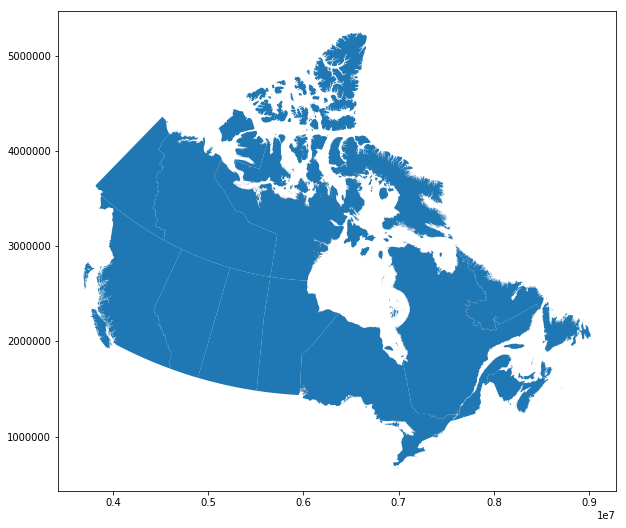

In [12]:
canada.plot(figsize=(10,10))

In [13]:
Pop_centers=geopandas.read_file("Pop_centers\lpc_000b16a_e.shp")

In [14]:
Pop_centers.head()

PCUID               PCNAME PCTYPE  PCPUID PCCLASS PRUID  \
0  0300              Fortune      4  100300       2    10   
1  0311               Gander      1  100311       2    10   
2  0329           Grand Bank      4  100329       2    10   
3  0332  Grand Falls-Windsor      1  100332       2    10   
4  0994               Wabana      4  100994       2    10   

                                              PRNAME CMAUID  \
0  Newfoundland and Labrador / Terre-Neuve-et-Lab...   None   
1  Newfoundland and Labrador / Terre-Neuve-et-Lab...    011   
2  Newfoundland and Labrador / Terre-Neuve-et-Lab...   None   
3  Newfoundland and Labrador / Terre-Neuve-et-Lab...    010   
4  Newfoundland and Labrador / Terre-Neuve-et-Lab...   None   

               CMANAME CMATYPE CMAPUID  \
0                 None    None    None   
1               Gander       D   10011   
2                 None    None    None   
3  Grand Falls-Windsor       D   10010   
4                 None    None    None   

                                            geometry  
0  POLYGON ((8814306.34 1975116.377145, 8814294.5...  
1  POLYGON ((8774241.248569999 2203304.44, 877434...  
2  POLYGON ((8817881.08 1980819.67143, 8817890.06...  
3  POLYGON ((8713608.417144999 2159194.442855, 87...  
4  POLYGON ((8960434.16 2150870.982855, 8960420.1...

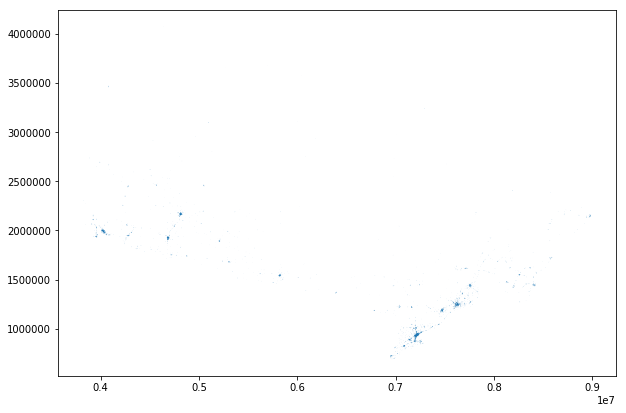

In [15]:
Pop_centers.plot(figsize=(10,10))

In [16]:
Metro_aggs=geopandas.read_file("Metro_aggs\lcma000b16a_e.shp")

In [17]:
Metro_aggs.head()

CMAUID CMAPUID         CMANAME CMATYPE PRUID           PRNAME  \
0    512   35512      Brockville       D    35          Ontario   
1    442   24442  Trois-Rivières       B    24  Quebec / Québec   
2    444   24444      Shawinigan       D    24  Quebec / Québec   
3    447   24447   Drummondville       K    24  Quebec / Québec   
4    450   24450          Granby       K    24  Quebec / Québec   

                                            geometry  
0  (POLYGON ((7494625.237145 1128257.37143, 74950...  
1  (POLYGON ((7685035.982855 1380936.54857, 76866...  
2  POLYGON ((7634181.68857 1409252.82857, 7634554...  
3  POLYGON ((7705178.24857 1332485.077145, 770518...  
4  POLYGON ((7703435.44 1270659.02, 7703893.90571...

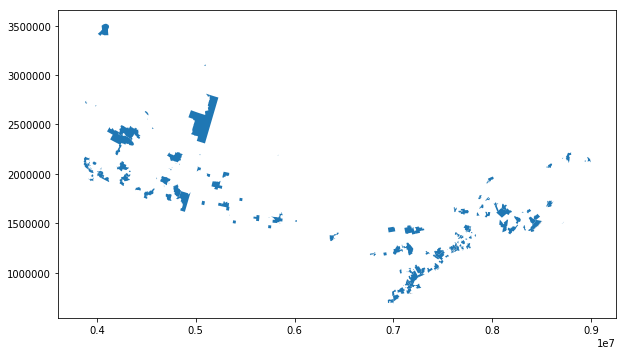

In [18]:
Metro_aggs.plot(figsize=(10,10))

In [19]:
FSA=geopandas.read_file("FSA/lfsa000b16a_e.shp")

In [20]:
FSA.head()

CFSAUID PRUID                         PRNAME  \
0     B1E    12  Nova Scotia / Nouvelle-Écosse   
1     B1G    12  Nova Scotia / Nouvelle-Écosse   
2     B1H    12  Nova Scotia / Nouvelle-Écosse   
3     B1J    12  Nova Scotia / Nouvelle-Écosse   
4     B1K    12  Nova Scotia / Nouvelle-Écosse   

                                            geometry  
0  POLYGON ((8585930.408569999 1725523.354285002,...  
1  POLYGON ((8584559.168569997 1728126.431430001,...  
2  POLYGON ((8580253.065715 1729544.062855002, 85...  
3  (POLYGON ((8572546.254285 1703050.734285001, 8...  
4  (POLYGON ((8591796.391429998 1717022.608569998...

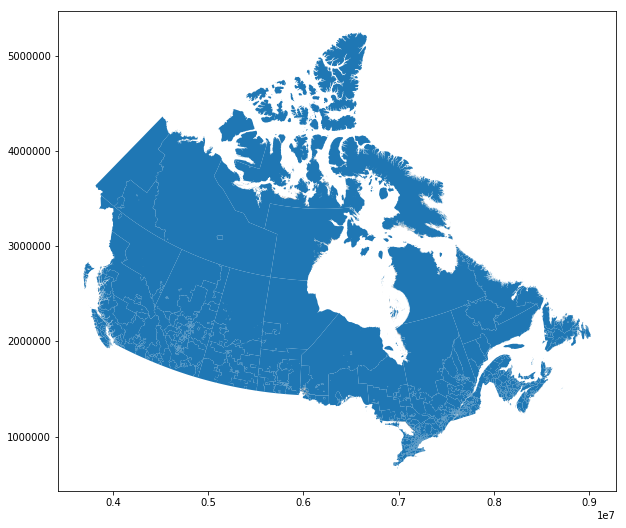

In [21]:
FSA.plot(figsize=(10,10))

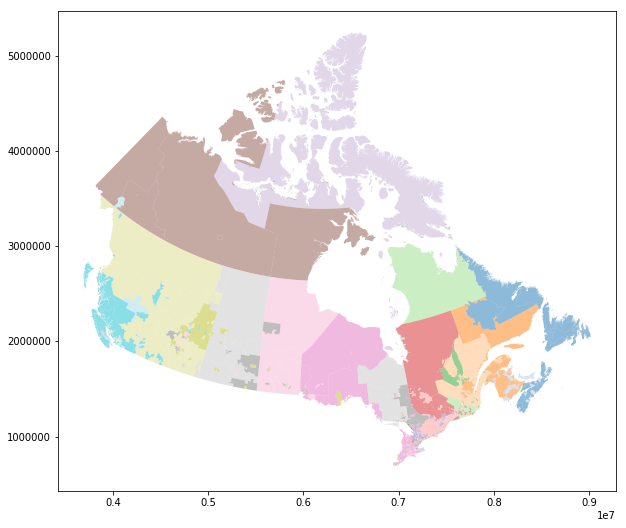

In [22]:
FSA.plot(figsize=(10,10),cmap='tab20',alpha=0.5)

In [23]:
len(FSA.CFSAUID)

1620

In [24]:
FSA.count()

CFSAUID     1620
PRUID       1620
PRNAME      1620
geometry    1620
dtype: int64

In [25]:
FSA.shape

(1620, 4)

In [26]:
FSA2=FSA
FSA2['rand']=np.random.rand(FSA.shape[0])

In [27]:
FSA2.head()

CFSAUID PRUID                         PRNAME  \
0     B1E    12  Nova Scotia / Nouvelle-Écosse   
1     B1G    12  Nova Scotia / Nouvelle-Écosse   
2     B1H    12  Nova Scotia / Nouvelle-Écosse   
3     B1J    12  Nova Scotia / Nouvelle-Écosse   
4     B1K    12  Nova Scotia / Nouvelle-Écosse   

                                            geometry      rand  
0  POLYGON ((8585930.408569999 1725523.354285002,...  0.829438  
1  POLYGON ((8584559.168569997 1728126.431430001,...  0.187843  
2  POLYGON ((8580253.065715 1729544.062855002, 85...  0.389503  
3  (POLYGON ((8572546.254285 1703050.734285001, 8...  0.185746  
4  (POLYGON ((8591796.391429998 1717022.608569998...  0.086453

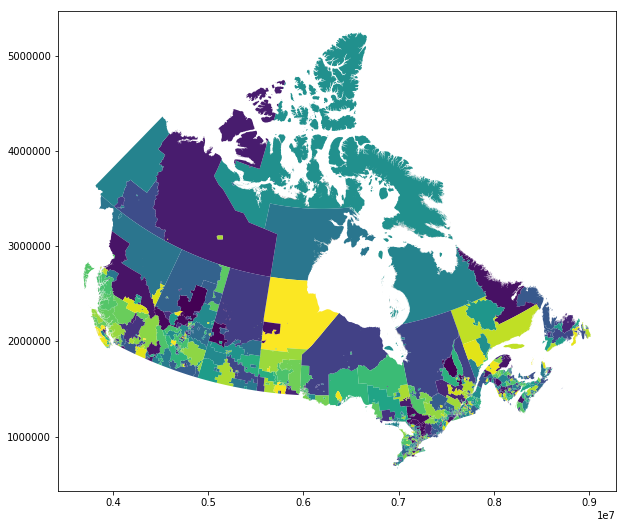

In [28]:
FSA2.plot(column='rand',figsize=(10,10))

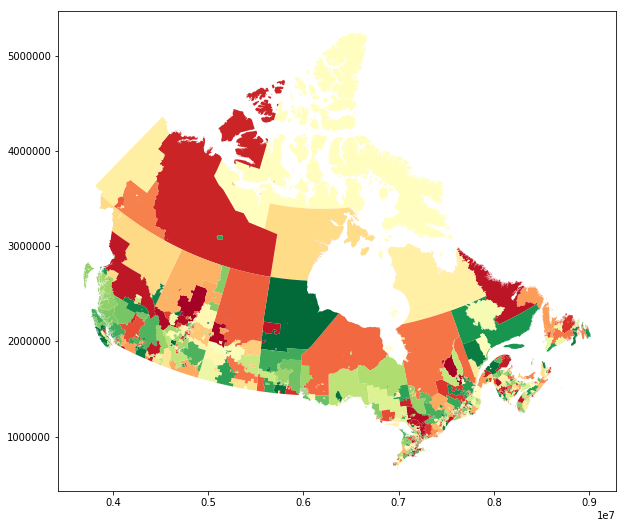

In [29]:
FSA2.plot(column='rand',cmap='RdYlGn',figsize=(10,10))#,legend=True)

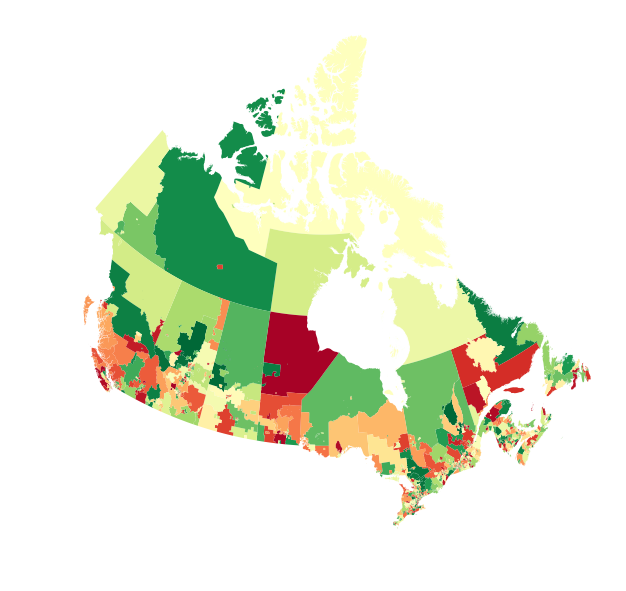

In [30]:
f, ax = plt.subplots(1,figsize=(10,10))
ax = FSA2.plot(column='rand',cmap='RdYlGn_r',ax=ax)
ax.set_axis_off()
plt.savefig('example1.png')

In [31]:
debt_diff0=pd.read_csv('debt_diff\debt_diff_201608.csv',index_col='fsa')
debt_diff1=pd.read_csv('debt_diff\debt_diff_201609.csv',index_col='fsa')
debt_diff2=pd.read_csv('debt_diff\debt_diff_201610.csv',index_col='fsa')
debt_diff3=pd.read_csv('debt_diff\debt_diff_201611.csv',index_col='fsa')
debt_diff4=pd.read_csv('debt_diff\debt_diff_201612.csv',index_col='fsa')
debt_diff5=pd.read_csv('debt_diff\debt_diff_201701.csv',index_col='fsa')
debt_diff6=pd.read_csv('debt_diff\debt_diff_201702.csv',index_col='fsa')
debt_diff7=pd.read_csv('debt_diff\debt_diff_201703.csv',index_col='fsa')
debt_diff8=pd.read_csv('debt_diff\debt_diff_201704.csv',index_col='fsa')
debt_diff9=pd.read_csv('debt_diff\debt_diff_201705.csv',index_col='fsa')
debt_diff10=pd.read_csv('debt_diff\debt_diff_201706.csv',index_col='fsa')
debt_diff11=pd.read_csv('debt_diff\debt_diff_201707.csv',index_col='fsa')

In [32]:
debt_diff11.head()

debt_change201707
fsa                   
A1P               -160
E6X               -132
G0K            3864760
G2Z            -191565
G4W            -440483

In [33]:
FSA3=FSA2.join(debt_diff0,on='CFSAUID')

In [34]:
FSA3.head()

CFSAUID PRUID                         PRNAME  \
0     B1E    12  Nova Scotia / Nouvelle-Écosse   
1     B1G    12  Nova Scotia / Nouvelle-Écosse   
2     B1H    12  Nova Scotia / Nouvelle-Écosse   
3     B1J    12  Nova Scotia / Nouvelle-Écosse   
4     B1K    12  Nova Scotia / Nouvelle-Écosse   

                                            geometry      rand  \
0  POLYGON ((8585930.408569999 1725523.354285002,...  0.829438   
1  POLYGON ((8584559.168569997 1728126.431430001,...  0.187843   
2  POLYGON ((8580253.065715 1729544.062855002, 85...  0.389503   
3  (POLYGON ((8572546.254285 1703050.734285001, 8...  0.185746   
4  (POLYGON ((8591796.391429998 1717022.608569998...  0.086453   

   debt_change201608  
0             625751  
1             418265  
2            2479376  
3             454871  
4            -368953

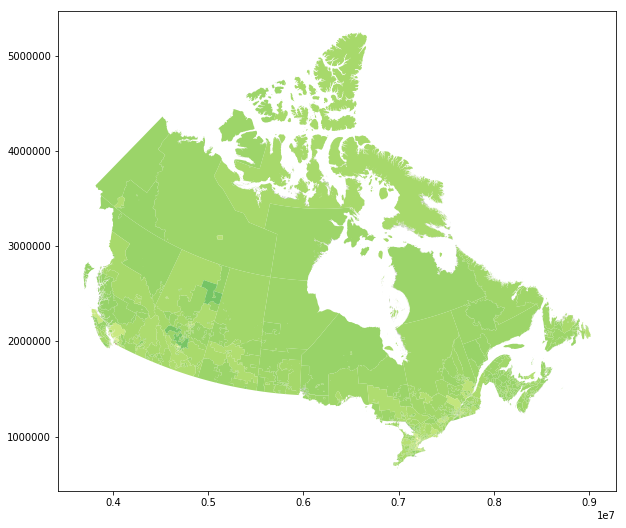

In [35]:
FSA3.plot(column='debt_change201608',cmap='RdYlGn_r',figsize=(10,10))

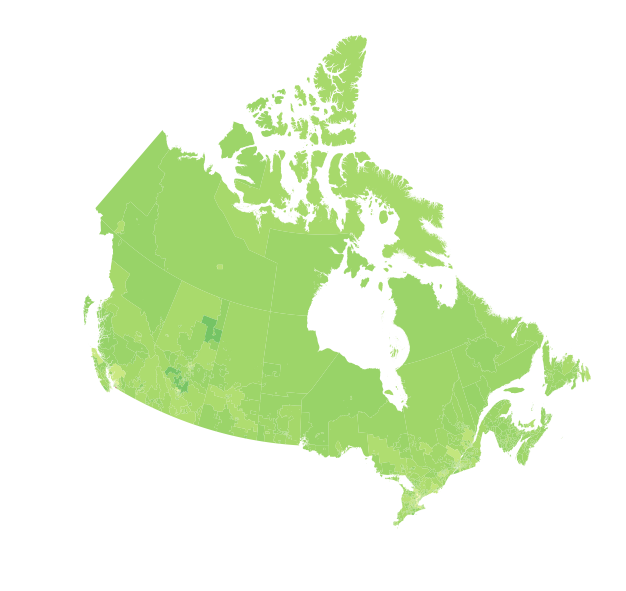

In [36]:
f, ax = plt.subplots(1,figsize=(10,10))
ax = FSA3.plot(column='debt_change201608',cmap='RdYlGn_r',ax=ax)
ax.set_axis_off()
plt.show()

In [37]:
Pop=pd.read_csv('Pop_FSA\Pop_2016.csv',index_col='Geographic_code')

In [38]:
Pop.head()

Geographic_name      Province or territory  \
Geographic_code                                              
1                        Canada                        NaN   
A0A                         A0A  Newfoundland and Labrador   
A0B                         A0B  Newfoundland and Labrador   
A0C                         A0C  Newfoundland and Labrador   
A0E                         A0E  Newfoundland and Labrador   

                Incompletely enumerated Indian reserves and Indian settlements, 2016  \
Geographic_code                                                                        
1                                                                T                     
A0A                                                            NaN                     
A0B                                                            NaN                     
A0C                                                            NaN                     
A0E                                                            NaN                     

                 Population_2016  Total private dwellings, 2016  \
Geographic_code                                                   
1                     35151728.0                     15412443.0   
A0A                      46587.0                        26155.0   
A0B                      19792.0                        13658.0   
A0C                      12587.0                         8010.0   
A0E                      22294.0                        12293.0   

                 Private dwellings occupied by usual residents, 2016  
Geographic_code                                                       
1                                                       14072079.0    
A0A                                                        19426.0    
A0B                                                         8792.0    
A0C                                                         5606.0    
A0E                                                         9603.0

In [39]:
FSA4=FSA3.join(Pop,on='CFSAUID')

In [40]:
FSA4.head()

CFSAUID PRUID                         PRNAME  \
0     B1E    12  Nova Scotia / Nouvelle-Écosse   
1     B1G    12  Nova Scotia / Nouvelle-Écosse   
2     B1H    12  Nova Scotia / Nouvelle-Écosse   
3     B1J    12  Nova Scotia / Nouvelle-Écosse   
4     B1K    12  Nova Scotia / Nouvelle-Écosse   

                                            geometry      rand  \
0  POLYGON ((8585930.408569999 1725523.354285002,...  0.829438   
1  POLYGON ((8584559.168569997 1728126.431430001,...  0.187843   
2  POLYGON ((8580253.065715 1729544.062855002, 85...  0.389503   
3  (POLYGON ((8572546.254285 1703050.734285001, 8...  0.185746   
4  (POLYGON ((8591796.391429998 1717022.608569998...  0.086453   

   debt_change201608 Geographic_name Province or territory  \
0             625751             B1E           Nova Scotia   
1             418265             B1G           Nova Scotia   
2            2479376             B1H           Nova Scotia   
3             454871             B1J           Nova Scotia   
4            -368953             B1K           Nova Scotia   

  Incompletely enumerated Indian reserves and Indian settlements, 2016  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   Population_2016  Total private dwellings, 2016  \
0           1564.0                          729.0   
1           1867.0                          898.0   
2           9642.0                         4539.0   
3            969.0                          707.0   
4           3049.0                         1951.0   

   Private dwellings occupied by usual residents, 2016  
0                                              682.0    
1                                              843.0    
2                                             4296.0    
3                                              479.0    
4                                             1321.0

In [41]:
FSA4['debt_diff_per_pop']=FSA4['debt_change201608']/FSA4['Population_2016']

In [42]:
FSA4.head()

CFSAUID PRUID                         PRNAME  \
0     B1E    12  Nova Scotia / Nouvelle-Écosse   
1     B1G    12  Nova Scotia / Nouvelle-Écosse   
2     B1H    12  Nova Scotia / Nouvelle-Écosse   
3     B1J    12  Nova Scotia / Nouvelle-Écosse   
4     B1K    12  Nova Scotia / Nouvelle-Écosse   

                                            geometry      rand  \
0  POLYGON ((8585930.408569999 1725523.354285002,...  0.829438   
1  POLYGON ((8584559.168569997 1728126.431430001,...  0.187843   
2  POLYGON ((8580253.065715 1729544.062855002, 85...  0.389503   
3  (POLYGON ((8572546.254285 1703050.734285001, 8...  0.185746   
4  (POLYGON ((8591796.391429998 1717022.608569998...  0.086453   

   debt_change201608 Geographic_name Province or territory  \
0             625751             B1E           Nova Scotia   
1             418265             B1G           Nova Scotia   
2            2479376             B1H           Nova Scotia   
3             454871             B1J           Nova Scotia   
4            -368953             B1K           Nova Scotia   

  Incompletely enumerated Indian reserves and Indian settlements, 2016  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   Population_2016  Total private dwellings, 2016  \
0           1564.0                          729.0   
1           1867.0                          898.0   
2           9642.0                         4539.0   
3            969.0                          707.0   
4           3049.0                         1951.0   

   Private dwellings occupied by usual residents, 2016  debt_diff_per_pop  
0                                              682.0           400.096547  
1                                              843.0           224.030530  
2                                             4296.0           257.143331  
3                                              479.0           469.423117  
4                                             1321.0          -121.007871

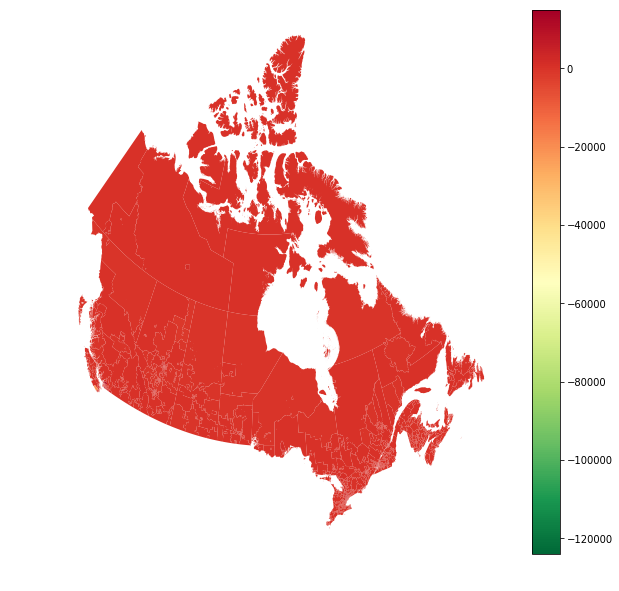

In [43]:
f2, ax2 = plt.subplots(1,figsize=(10,10))
ax2 = FSA4.plot(column='debt_diff_per_pop',cmap='RdYlGn_r',ax=ax2,legend=True)
ax2.set_axis_off()
plt.show()

(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 1., 2., 0., 0., 1., 0., 0., 1.]),
 array([-130000., -128740., -127480., -126220., -124960., -123700.,
        -122440., -121180., -119920., -118660., -117400., -116140.,
        -114880., -113620., -112360., -111100., -109840., -108580.,
        -107320., -106060., -104800., -103540., -102280., -101020.,
         -99760.,  -98500.,  -97240.,  -95980.,  -94720.,  -93460.,
         -92200.,  -90940.,  -89680.,  -88420.,  -87160.,  -85900.,
         -84640.,  -83380.,  -82120.,  -80860.,  -79600.,  -78340.,
         -77080.,  -75820.,  -74560.,  -73300.,  -72040.,  -70780.,
      

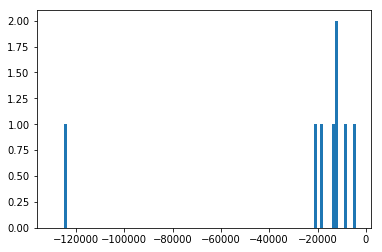

In [44]:
plt.hist(FSA4['debt_diff_per_pop'],bins=100,range=(-130000,-4000))

(array([ 0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  3.,  1.,  1.,  0.,  0.,
         2.,  2.,  1.,  0.,  2.,  4.,  7.,  3.,  2.,  8.,  8.,  6., 10.,
        10., 13., 18., 12., 15., 15., 17., 35., 31., 54., 45., 47., 55.,
        40., 80., 54., 57., 53., 48., 49., 56., 38., 33., 36., 28., 29.,
        35., 28., 24., 35., 26., 21., 25., 29., 16., 12., 11., 22.,  9.,
        11., 12.,  8., 12., 11., 11., 10.,  4.,  5.,  2., 11.,  7.,  7.,
         5., 10.,  8.,  7.,  7.,  8.,  1.,  4.,  7.,  3.,  3.,  2.,  2.,
         1.,  1.,  3.,  1.,  2.,  1.,  2.,  0.,  2.]),
 array([-1000.,  -970.,  -940.,  -910.,  -880.,  -850.,  -820.,  -790.,
         -760.,  -730.,  -700.,  -670.,  -640.,  -610.,  -580.,  -550.,
         -520.,  -490.,  -460.,  -430.,  -400.,  -370.,  -340.,  -310.,
         -280.,  -250.,  -220.,  -190.,  -160.,  -130.,  -100.,   -70.,
          -40.,   -10.,    20.,    50.,    80.,   110.,   140.,   170.,
          200.,   230.,   260.,   290.,   320.,   350.,   380.,   410.,
  

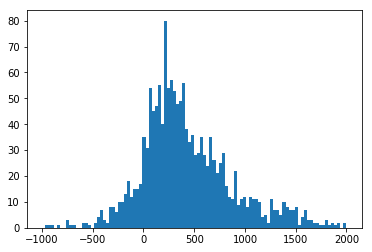

In [45]:
plt.hist(FSA4['debt_diff_per_pop'],bins=100,range=(-1000,2000))

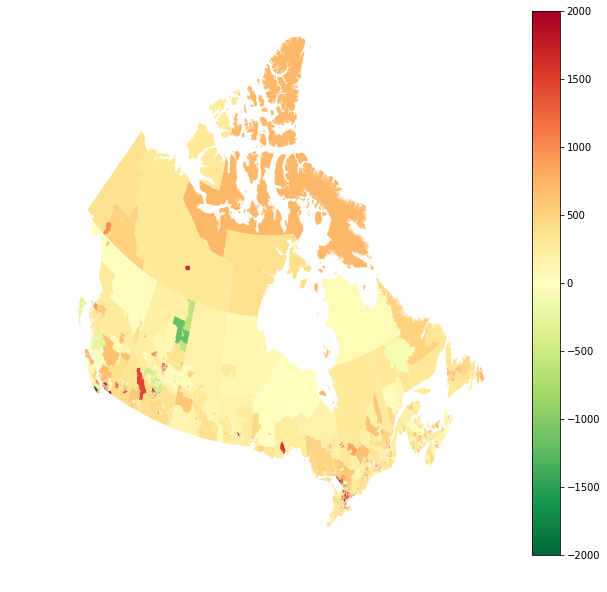

In [46]:
f2, ax2 = plt.subplots(1,figsize=(10,10))
ax2 = FSA4.plot(column='debt_diff_per_pop',cmap='RdYlGn_r',ax=ax2,legend=True,vmin=-2000,vmax=2000)
ax2.set_axis_off()
plt.show()

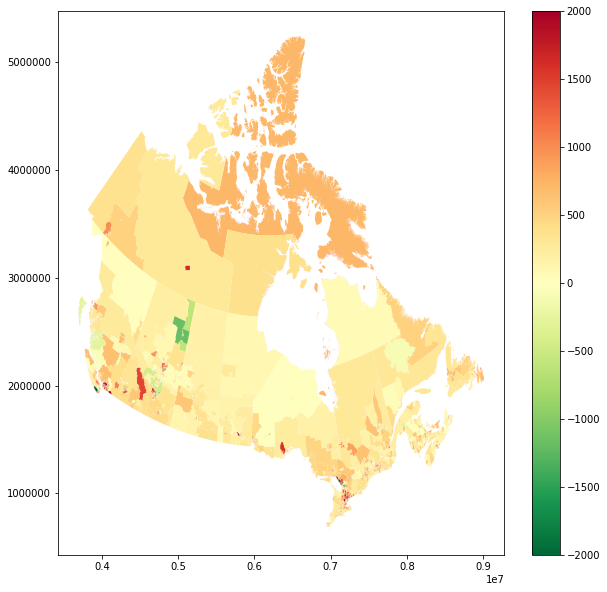

In [47]:
f3, ax3 = plt.subplots(1,figsize=(10,10))
ax3 = FSA4.plot(column='debt_diff_per_pop',cmap='RdYlGn_r',ax=ax3,legend=True,vmin=-2000,vmax=2000)
plt.show()

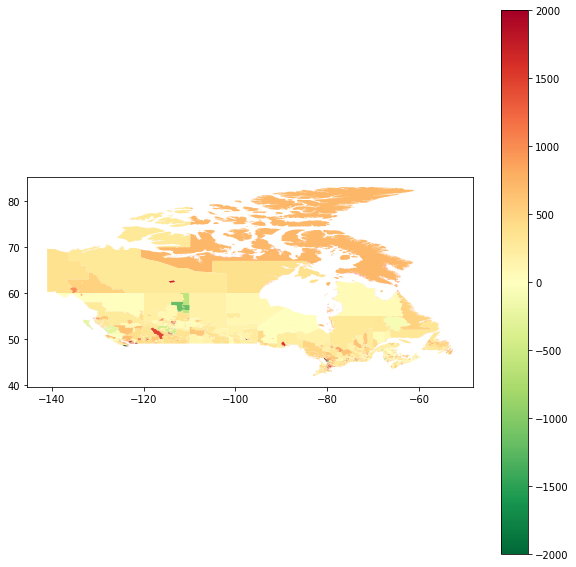

In [48]:
#EPSG:5321 with transformation: 1842
#lsoas.to_crs(epsg=4326).plot()
#lims = plt.axis('equal')
#crs = {'init': 'epsg:4326'}
FSA5=FSA4.to_crs(epsg=4326)
f4, ax4 = plt.subplots(1,figsize=(10,10))
ax4 = FSA5.plot(column='debt_diff_per_pop',cmap='RdYlGn_r',ax=ax4,legend=True,vmin=-2000,vmax=2000)
ax4.set_aspect('equal')
plt.show()

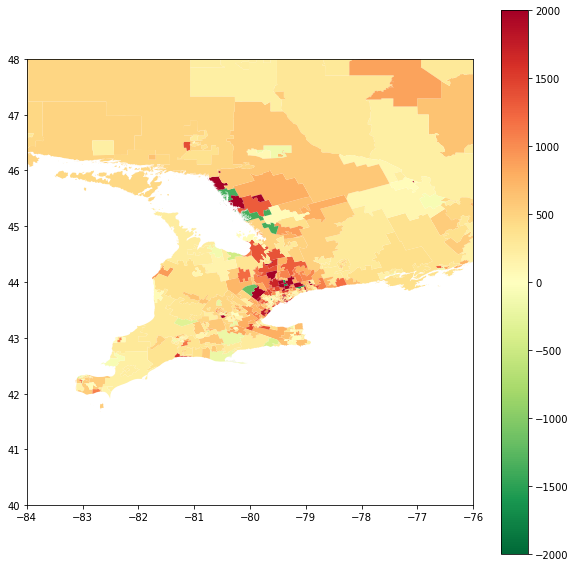

In [49]:
f5, ax5 = plt.subplots(1,figsize=(10,10))
ax4 = FSA5.plot(column='debt_diff_per_pop',cmap='RdYlGn_r',ax=ax5,legend=True,vmin=-2000,vmax=2000)
ax4.set_aspect('equal')
ax5.set_xlim(-84, -76)
ax5.set_ylim(40, 48)
plt.show()

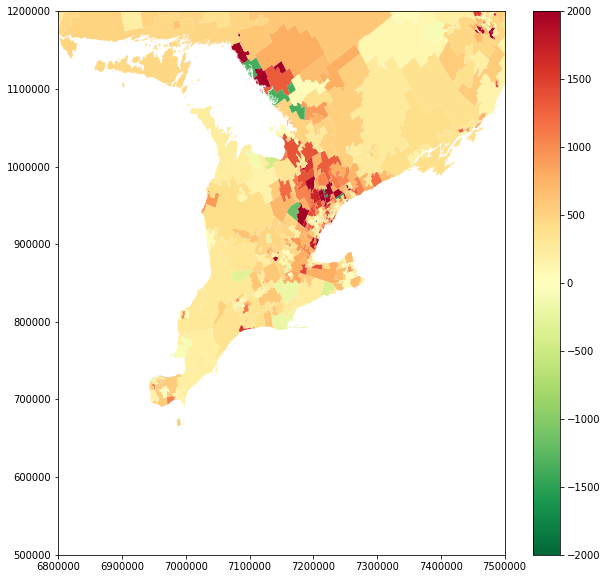

In [50]:
f3, ax3 = plt.subplots(1,figsize=(10,10))
ax3 = FSA4.plot(column='debt_diff_per_pop',cmap='RdYlGn_r',ax=ax3,legend=True,vmin=-2000,vmax=2000)
ax3.set_xlim(6800000, 7500000)
ax3.set_ylim(500000, 1200000)
plt.show()

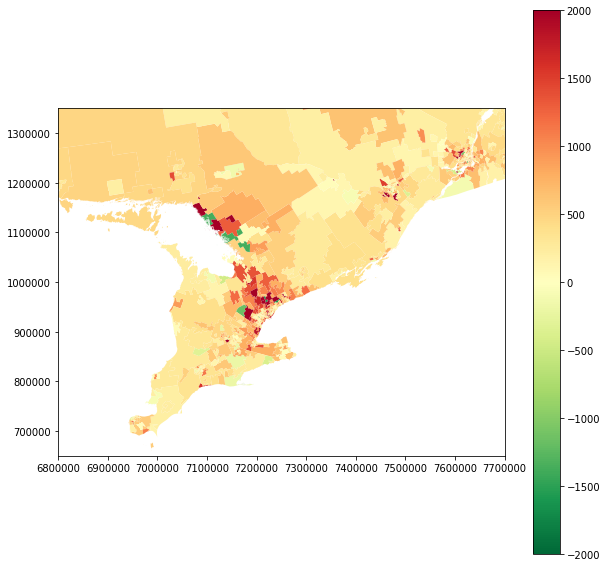

In [51]:
f3, ax3 = plt.subplots(1,figsize=(10,10))
ax3 = FSA4.plot(column='debt_diff_per_pop',cmap='RdYlGn_r',ax=ax3,legend=True,vmin=-2000,vmax=2000)
ax3.set_xlim(6800000, 7700000)
ax3.set_ylim(650000, 1350000)
ax3.set_aspect('equal')
plt.show()

In [52]:
start_year='2016'
start_month='08'
end_year='2017'
end_month='07'
date_list=[]
num_mo=12*(int(end_year)-int(start_year))+int(end_month)-int(start_month)+1
yy=start_year
mm=start_month
for k in range(num_mo):
    date_list.append(yy+mm)
    if mm=='12':
        mm='01'
        yy=str(1+int(yy))
    elif int(mm)<9:
        mm='0'+str(1+int(mm))
    else:
        mm=str(1+int(mm))
print(date_list)

['201608', '201609', '201610', '201611', '201612', '201701', '201702', '201703', '201704', '201705', '201706', '201707']


In [53]:
dcd={}
for k in range(num_mo):
    dcd['dcd'+str(k)]=pd.read_csv('debt_diff\debt_diff_'+date_list[k]+'.csv',index_col='fsa')
for k in range(num_mo):
    if k==0:
        df_fin=FSA.join(dcd['dcd'+str(k)],on='CFSAUID')
    else:
        df_fin=df_fin.join(dcd['dcd'+str(k)],on='CFSAUID')
df_fin=df_fin.join(Pop,on='CFSAUID')
df_fin.head()

CFSAUID PRUID                         PRNAME  \
0     B1E    12  Nova Scotia / Nouvelle-Écosse   
1     B1G    12  Nova Scotia / Nouvelle-Écosse   
2     B1H    12  Nova Scotia / Nouvelle-Écosse   
3     B1J    12  Nova Scotia / Nouvelle-Écosse   
4     B1K    12  Nova Scotia / Nouvelle-Écosse   

                                            geometry      rand  \
0  POLYGON ((8585930.408569999 1725523.354285002,...  0.829438   
1  POLYGON ((8584559.168569997 1728126.431430001,...  0.187843   
2  POLYGON ((8580253.065715 1729544.062855002, 85...  0.389503   
3  (POLYGON ((8572546.254285 1703050.734285001, 8...  0.185746   
4  (POLYGON ((8591796.391429998 1717022.608569998...  0.086453   

   debt_change201608  debt_change201609  debt_change201610  debt_change201611  \
0             625751              98271             911491             400076   
1             418265            -642019             257066            1147161   
2            2479376             217342             643665            -966245   
3             454871            -816223            -665799             492281   
4            -368953             251241             162582            -101123   

   debt_change201612                         ...                          \
0             767898                         ...                           
1              89593                         ...                           
2             243999                         ...                           
3             661248                         ...                           
4             327278                         ...                           

   debt_change201704  debt_change201705  debt_change201706  debt_change201707  \
0           -1307261            -496643             118852            -449578   
1            -697655            -196208            -110725             376301   
2           -4869574             613520             193627             720486   
3             362076            -345566             700139            -220353   
4           -1305047             138564             115388            1120198   

   Geographic_name  Province or territory  \
0              B1E            Nova Scotia   
1              B1G            Nova Scotia   
2              B1H            Nova Scotia   
3              B1J            Nova Scotia   
4              B1K            Nova Scotia   

   Incompletely enumerated Indian reserves and Indian settlements, 2016  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                                NaN                      
4                                                NaN                      

  Population_2016 Total private dwellings, 2016  \
0          1564.0                         729.0   
1          1867.0                         898.0   
2          9642.0                        4539.0   
3           969.0                         707.0   
4          3049.0                        1951.0   

  Private dwellings occupied by usual residents, 2016  
0                                              682.0   
1                                              843.0   
2                                             4296.0   
3                                              479.0   
4                                             1321.0   

[5 rows x 23 columns]

In [54]:
for item in date_list:
    df_fin['ddpp_'+item]=df_fin['debt_change'+item]/df_fin['Population_2016']
df_fin.head()

CFSAUID PRUID                         PRNAME  \
0     B1E    12  Nova Scotia / Nouvelle-Écosse   
1     B1G    12  Nova Scotia / Nouvelle-Écosse   
2     B1H    12  Nova Scotia / Nouvelle-Écosse   
3     B1J    12  Nova Scotia / Nouvelle-Écosse   
4     B1K    12  Nova Scotia / Nouvelle-Écosse   

                                            geometry      rand  \
0  POLYGON ((8585930.408569999 1725523.354285002,...  0.829438   
1  POLYGON ((8584559.168569997 1728126.431430001,...  0.187843   
2  POLYGON ((8580253.065715 1729544.062855002, 85...  0.389503   
3  (POLYGON ((8572546.254285 1703050.734285001, 8...  0.185746   
4  (POLYGON ((8591796.391429998 1717022.608569998...  0.086453   

   debt_change201608  debt_change201609  debt_change201610  debt_change201611  \
0             625751              98271             911491             400076   
1             418265            -642019             257066            1147161   
2            2479376             217342             643665            -966245   
3             454871            -816223            -665799             492281   
4            -368953             251241             162582            -101123   

   debt_change201612     ...      ddpp_201610  ddpp_201611  ddpp_201612  \
0             767898     ...       582.794757   255.803069   490.983376   
1              89593     ...       137.689341   614.440814    47.987681   
2             243999     ...        66.756378  -100.212093    25.305849   
3             661248     ...      -687.099071   508.029928   682.402477   
4             327278     ...        53.323057   -33.165956   107.339456   

   ddpp_201701  ddpp_201702  ddpp_201703  ddpp_201704 ddpp_201705 ddpp_201706  \
0  -165.455243  -134.745524  -278.746803  -835.844629 -317.546675   75.992327   
1  -209.185324   -84.815747   -68.131227  -373.677022 -105.092662  -59.306374   
2    77.489836  -225.594068    15.879278  -505.037752   63.629952   20.081622   
3  -937.270382  -197.375645  -387.197110   373.659443 -356.621259  722.537668   
4   287.762873  -161.585438  -341.307970  -428.024598   45.445720   37.844539   

  ddpp_201707  
0 -287.453964  
1  201.553830  
2   74.723709  
3 -227.402477  
4  367.398491  

[5 rows x 35 columns]

In [55]:
drop_list=[]
for item in date_list:
    drop_list.append('debt_change'+item)
drop_list.append('rand')
drop_list.append('Geographic_name')
drop_list.append('Province or territory')
drop_list.append('Incompletely enumerated Indian reserves and Indian settlements, 2016')
drop_list.append('Population_2016')
drop_list.append('Total private dwellings, 2016')
drop_list.append('Private dwellings occupied by usual residents, 2016')

for item in date_list:
    df_fin2=df_fin.drop(columns=drop_list)
df_fin2.head()

CFSAUID PRUID                         PRNAME  \
0     B1E    12  Nova Scotia / Nouvelle-Écosse   
1     B1G    12  Nova Scotia / Nouvelle-Écosse   
2     B1H    12  Nova Scotia / Nouvelle-Écosse   
3     B1J    12  Nova Scotia / Nouvelle-Écosse   
4     B1K    12  Nova Scotia / Nouvelle-Écosse   

                                            geometry  ddpp_201608  \
0  POLYGON ((8585930.408569999 1725523.354285002,...   400.096547   
1  POLYGON ((8584559.168569997 1728126.431430001,...   224.030530   
2  POLYGON ((8580253.065715 1729544.062855002, 85...   257.143331   
3  (POLYGON ((8572546.254285 1703050.734285001, 8...   469.423117   
4  (POLYGON ((8591796.391429998 1717022.608569998...  -121.007871   

   ddpp_201609  ddpp_201610  ddpp_201611  ddpp_201612  ddpp_201701  \
0    62.833120   582.794757   255.803069   490.983376  -165.455243   
1  -343.877343   137.689341   614.440814    47.987681  -209.185324   
2    22.541174    66.756378  -100.212093    25.305849    77.489836   
3  -842.335397  -687.099071   508.029928   682.402477  -937.270382   
4    82.401115    53.323057   -33.165956   107.339456   287.762873   

   ddpp_201702  ddpp_201703  ddpp_201704  ddpp_201705  ddpp_201706  \
0  -134.745524  -278.746803  -835.844629  -317.546675    75.992327   
1   -84.815747   -68.131227  -373.677022  -105.092662   -59.306374   
2  -225.594068    15.879278  -505.037752    63.629952    20.081622   
3  -197.375645  -387.197110   373.659443  -356.621259   722.537668   
4  -161.585438  -341.307970  -428.024598    45.445720    37.844539   

   ddpp_201707  
0  -287.453964  
1   201.553830  
2    74.723709  
3  -227.402477  
4   367.398491

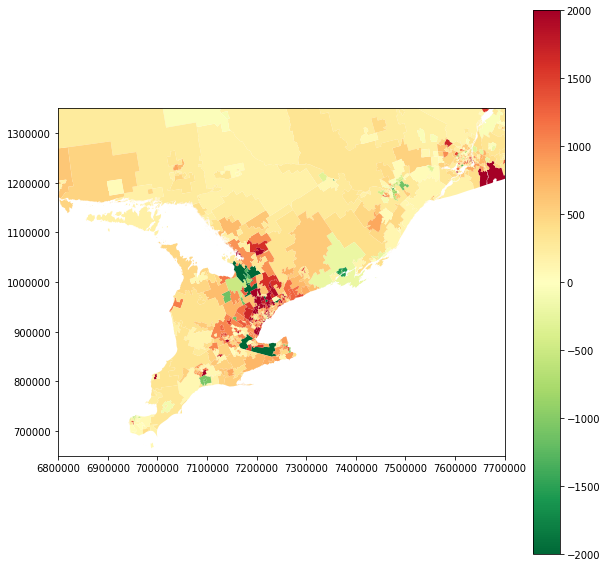

In [48]:
f7, ax7 = plt.subplots(1,figsize=(10,10))
ax7 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=ax7,legend=True,vmin=-2000,vmax=2000)
ax7.set_xlim(6800000, 7700000)
ax7.set_ylim(650000, 1350000)
ax7.set_aspect('equal')
plt.show()

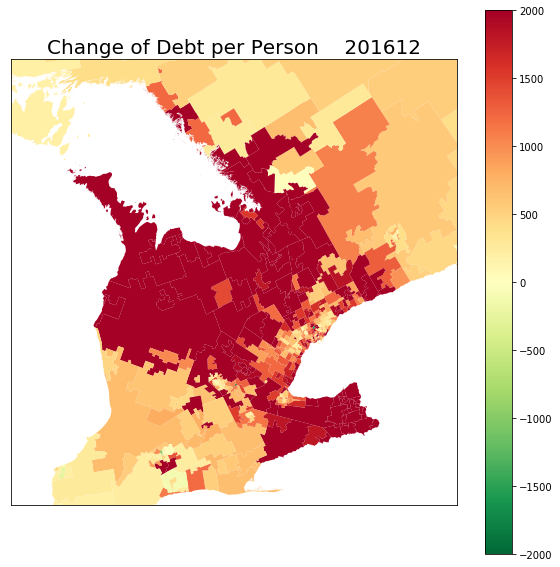

In [75]:
f7, ax7 = plt.subplots(1,figsize=(10,10))
ax7 = df_fin2.plot(column='ddpp_201612',cmap='RdYlGn_r',ax=ax7,legend=True,vmin=-2000,vmax=2000)
ax7.set_xlim(6950000, 7350000)
ax7.set_ylim(780000, 1180000)
ax7.set_aspect('equal')
ax7.set_title("Change of Debt per Person    "+date_list[4], fontsize=20)
ax7.get_xaxis().set_visible(False)
ax7.get_yaxis().set_visible(False)
plt.show()

(array([5., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 10000.,  16900.,  23800.,  30700.,  37600.,  44500.,  51400.,
         58300.,  65200.,  72100.,  79000.,  85900.,  92800.,  99700.,
        106600., 113500., 120400., 127300., 134200., 141100., 148000.,
        154900., 161800., 168700., 175600., 182500., 189400., 196300.,
        203200., 210100., 217000., 223900., 230800., 237700., 244600.,
        251500., 258400., 265300., 272200., 279100., 286000., 292900.,
        299800., 306700., 313600., 320500., 327400., 334300., 341200.,
        348100., 355000., 361900., 368800., 375700., 

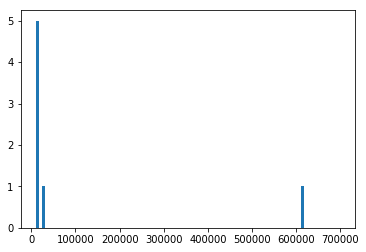

In [69]:
plt.hist(df_fin2['ddpp_201612'],bins=100,range=(10000,700000))

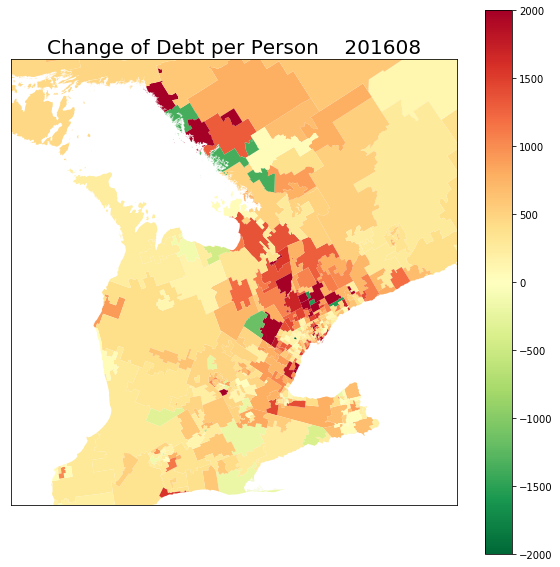

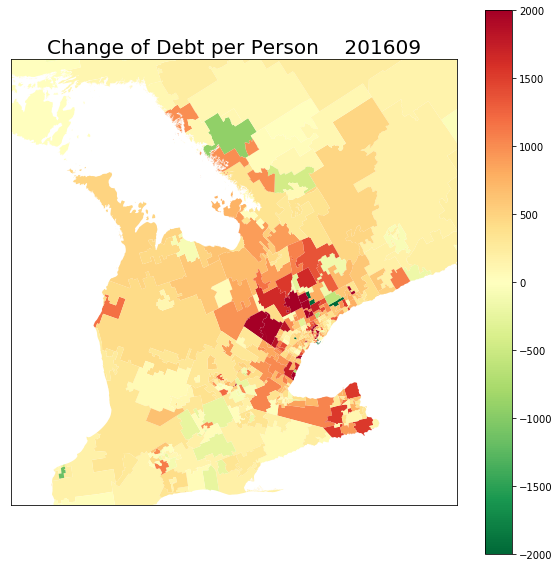

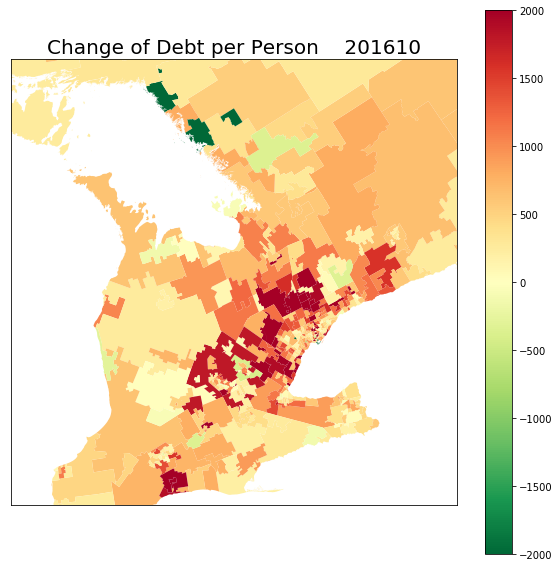

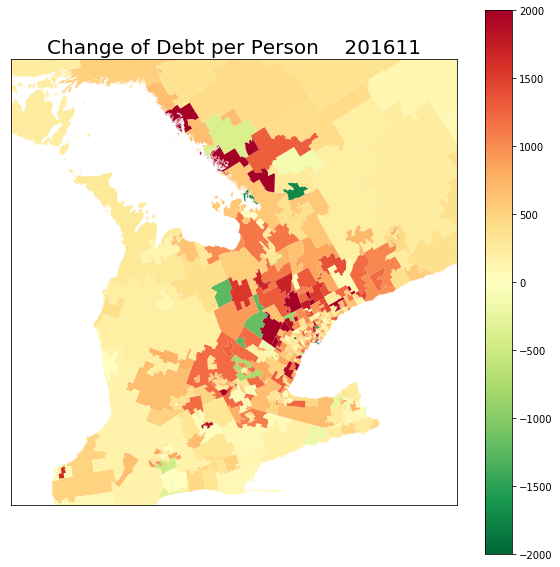

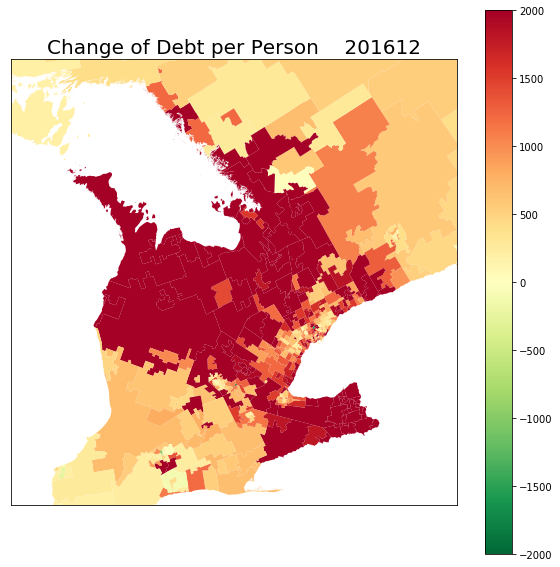

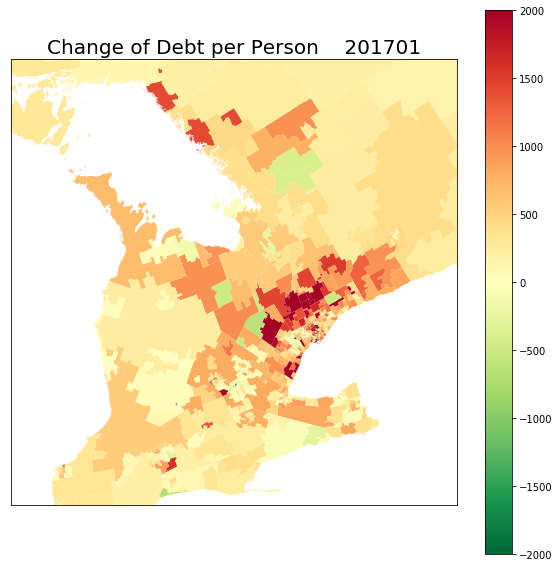

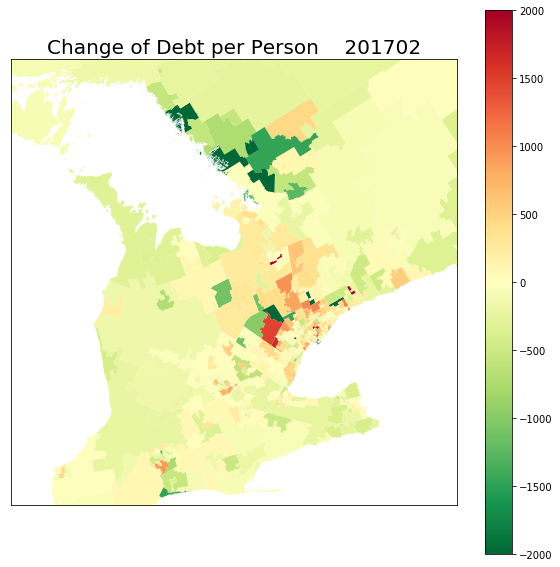

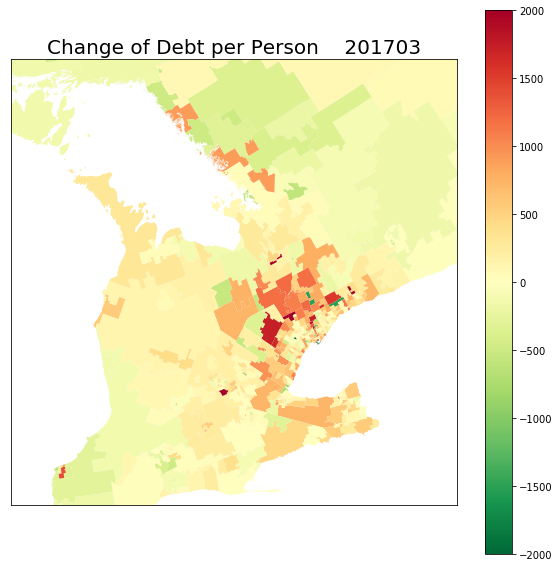

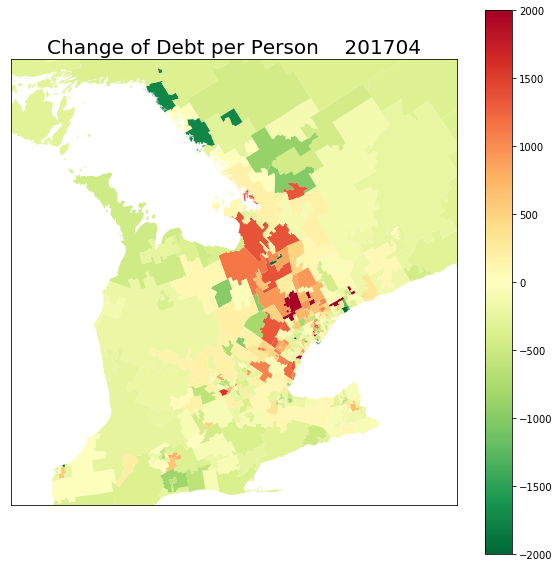

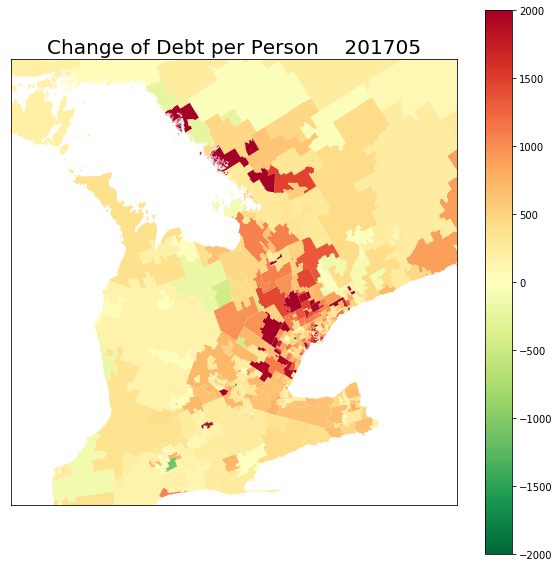

In [79]:
## change code so that map_201608_201707_0-11_test is the name
cc=0
for date in date_list[0:10]:
    ff1, aa1 = plt.subplots(1,figsize=(10,10))
    aa1 = df_fin2.plot(column='ddpp_'+date,cmap='RdYlGn_r',ax=aa1,legend=True,vmin=-2000,vmax=2000)
    aa1.set_xlim(6950000, 7350000)
    aa1.set_ylim(780000, 1180000)
    aa1.set_aspect('equal')
    aa1.set_title("Change of Debt per Person    "+date, fontsize=20)
    aa1.get_xaxis().set_visible(False)
    aa1.get_yaxis().set_visible(False)
    if cc<10:
        cc2='0'+str(cc)
    else:
        cc2=str(cc)
    plt.savefig('debt_change_'+cc2+'.png');
    cc+=1

In [80]:
os.system("ffmpeg -f image2 -r 1 -i debt_change_%02d.png -vcodec mpeg4 -y debt_change.mp4")

0

In [81]:
df_fin2['centroids']=df_fin2.centroid
df_fin2.head()

CFSAUID PRUID                         PRNAME  \
0     B1E    12  Nova Scotia / Nouvelle-Écosse   
1     B1G    12  Nova Scotia / Nouvelle-Écosse   
2     B1H    12  Nova Scotia / Nouvelle-Écosse   
3     B1J    12  Nova Scotia / Nouvelle-Écosse   
4     B1K    12  Nova Scotia / Nouvelle-Écosse   

                                            geometry  ddpp_201608  \
0  POLYGON ((8585930.408569999 1725523.354285002,...   400.096547   
1  POLYGON ((8584559.168569997 1728126.431430001,...   224.030530   
2  POLYGON ((8580253.065715 1729544.062855002, 85...   257.143331   
3  (POLYGON ((8572546.254285 1703050.734285001, 8...   469.423117   
4  (POLYGON ((8591796.391429998 1717022.608569998...  -121.007871   

   ddpp_201609  ddpp_201610  ddpp_201611  ddpp_201612  ddpp_201701  \
0    62.833120   582.794757   255.803069   490.983376  -165.455243   
1  -343.877343   137.689341   614.440814    47.987681  -209.185324   
2    22.541174    66.756378  -100.212093    25.305849    77.489836   
3  -842.335397  -687.099071   508.029928   682.402477  -937.270382   
4    82.401115    53.323057   -33.165956   107.339456   287.762873   

   ddpp_201702  ddpp_201703  ddpp_201704  ddpp_201705  ddpp_201706  \
0  -134.745524  -278.746803  -835.844629  -317.546675    75.992327   
1   -84.815747   -68.131227  -373.677022  -105.092662   -59.306374   
2  -225.594068    15.879278  -505.037752    63.629952    20.081622   
3  -197.375645  -387.197110   373.659443  -356.621259   722.537668   
4  -161.585438  -341.307970  -428.024598    45.445720    37.844539   

   ddpp_201707                                    centroids  
0  -287.453964  POINT (8585493.777772866 1724196.637725235)  
1   201.553830   POINT (8584225.54046471 1726447.460479764)  
2    74.723709  POINT (8579194.031729445 1724788.023536767)  
3  -227.402477  POINT (8566937.715994105 1682520.204234827)  
4   367.398491   POINT (8584569.238767372 1686984.12829852)

In [90]:
fsa_zoom=[]
for k in range(len(df_fin2)):
    if df_fin2['centroids'][k].x>6950000 and df_fin2['centroids'][k].x<7350000 \
    and df_fin2['centroids'][k].y>780000 and df_fin2['centroids'][k].y<1180000:
        fsa_zoom.append(df_fin2['CFSAUID'][k])
print(len(fsa_zoom))

366


In [91]:
print(fsa_zoom)

['L1J', 'L1N', 'K0J', 'K0L', 'K0M', 'K9A', 'K9J', 'K9V', 'L0A', 'L0B', 'L0C', 'L0E', 'L0G', 'L0H', 'L0K', 'L0L', 'L0M', 'L0N', 'L0P', 'K9H', 'K9K', 'K9L', 'L0J', 'L0R', 'L0S', 'L1A', 'L1B', 'L1C', 'L1E', 'L1G', 'L1H', 'L1K', 'L1L', 'L1M', 'L2A', 'L2E', 'L2G', 'L8G', 'L8L', 'L8M', 'L8N', 'L4X', 'L4Y', 'L4Z', 'L5A', 'N1P', 'N1R', 'M1P', 'M1R', 'M6C', 'M6E', 'M6G', 'L8S', 'L8T', 'L8V', 'N1S', 'N1T', 'N2A', 'N2B', 'L2M', 'L2N', 'L2P', 'L2R', 'L3B', 'L3C', 'L3K', 'L3M', 'L3P', 'L3R', 'L3S', 'L3T', 'L3V', 'L3Y', 'L3Z', 'L4A', 'L4H', 'L4J', 'L4K', 'L4L', 'L4M', 'L4P', 'L4R', 'L7P', 'L8E', 'M4K', 'M4L', 'M4M', 'L5V', 'M6M', 'M6N', 'M6P', 'M8W', 'M8X', 'M8Y', 'M4A', 'M4B', 'M4C', 'L5W', 'N2K', 'N2L', 'L6S', 'L6T', 'L6V', 'L6W', 'L7E', 'L7J', 'L7N', 'M9B', 'M9C', 'L5B', 'L5C', 'L5E', 'L5G', 'L5H', 'L5N', 'L9G', 'L9H', 'N2M', 'N2N', 'L9K', 'M1S', 'M1T', 'M1V', 'M2J', 'M2M', 'N2C', 'N2E', 'N2G', 'L9L', 'L9M', 'L9S', 'L9T', 'L9V', 'L9W', 'L9Y', 'M1B', 'M1E', 'M1G', 'M1J', 'M1M', 'M2K', 'M2L', 'M4N'

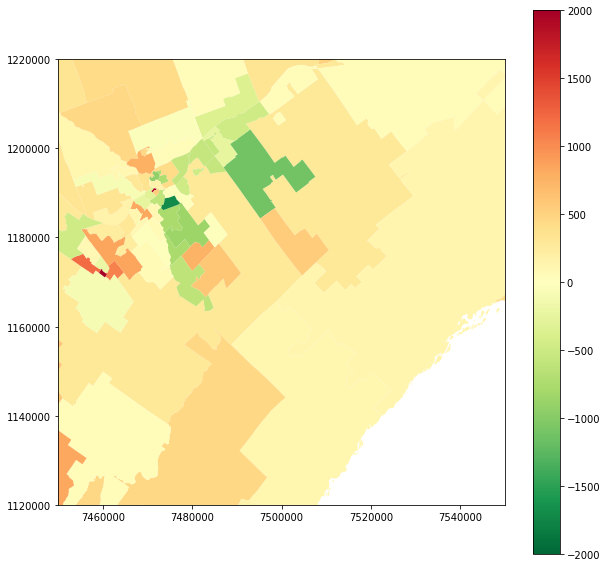

In [49]:
f7, ax7 = plt.subplots(1,figsize=(10,10))
ax7 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=ax7,legend=True,vmin=-2000,vmax=2000)
ax7.set_xlim(7450000, 7550000)
ax7.set_ylim(1120000, 1220000)
ax7.set_aspect('equal')
plt.show()

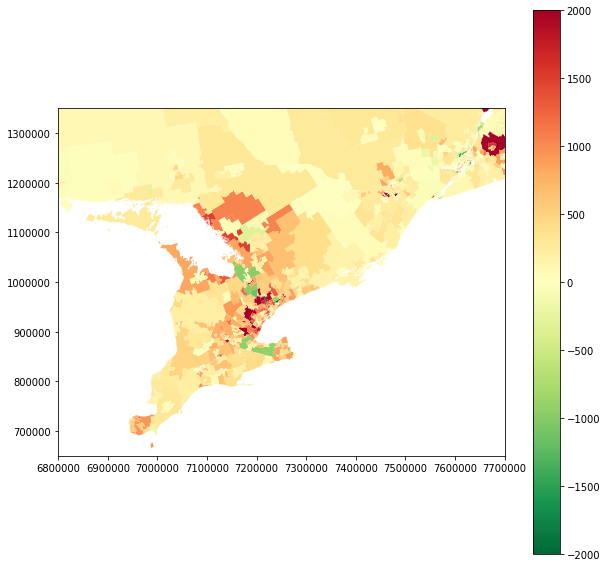

In [50]:
ff0, aa0 = plt.subplots(1,figsize=(10,10))
aa0 = df_fin2.plot(column='ddpp_201706',cmap='RdYlGn_r',ax=aa0,legend=True,vmin=-2000,vmax=2000)
aa0.set_xlim(6800000, 7700000)
aa0.set_ylim(650000, 1350000)
aa0.set_aspect('equal')
plt.savefig('map_201706_test.png')

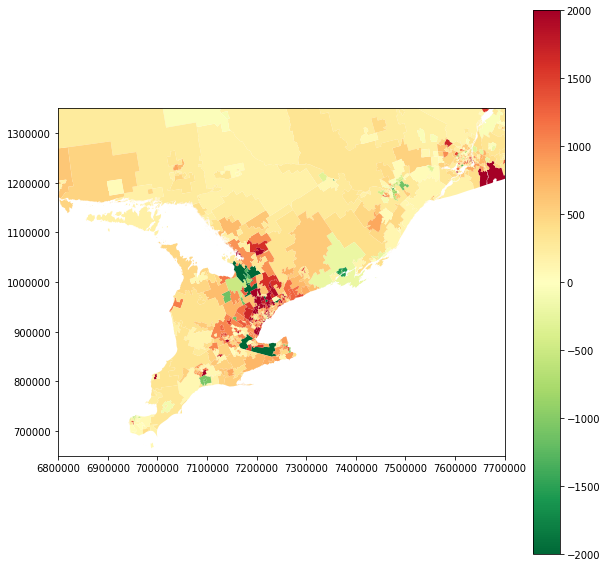

In [51]:
ff1, aa1 = plt.subplots(1,figsize=(10,10))
aa1 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=aa1,legend=True,vmin=-2000,vmax=2000)
aa1.set_xlim(6800000, 7700000)
aa1.set_ylim(650000, 1350000)
aa1.set_aspect('equal')
plt.savefig('map_201707_test.png')

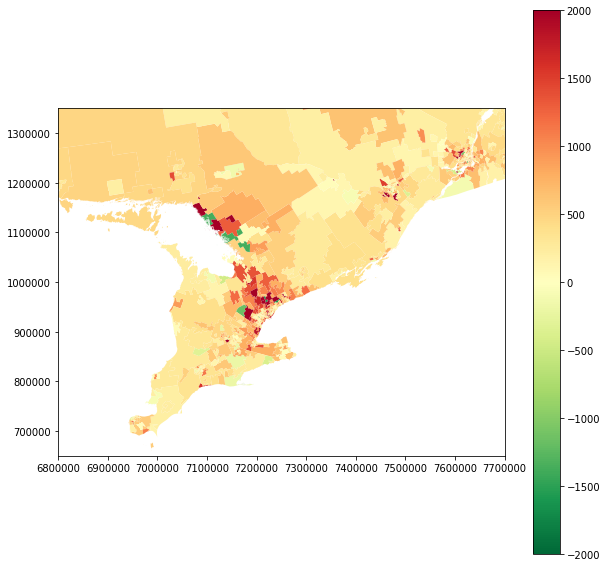

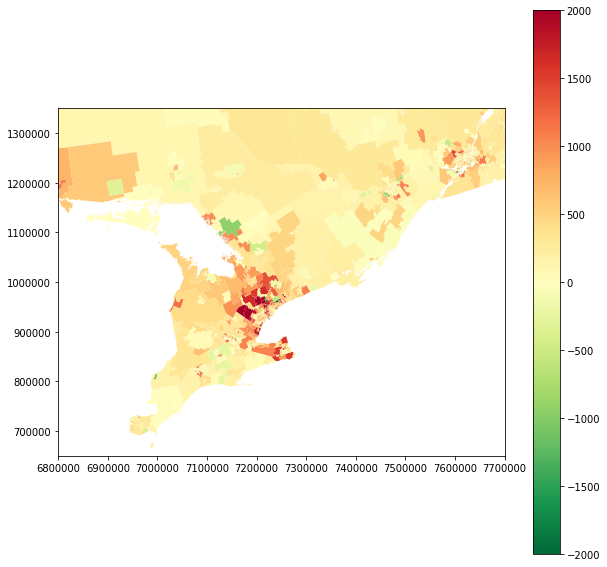

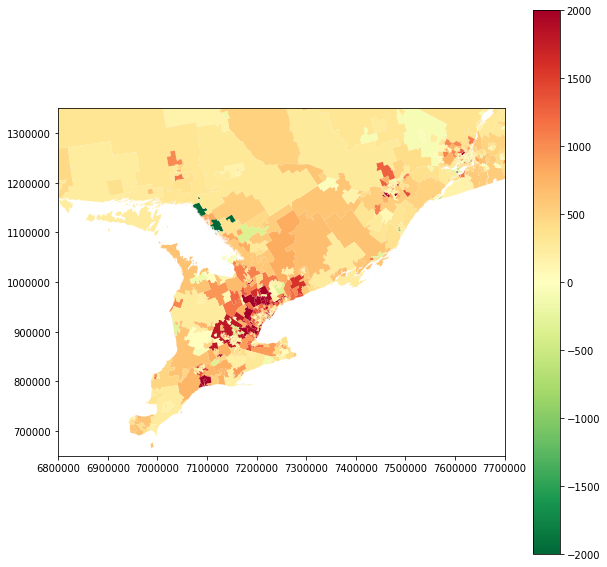

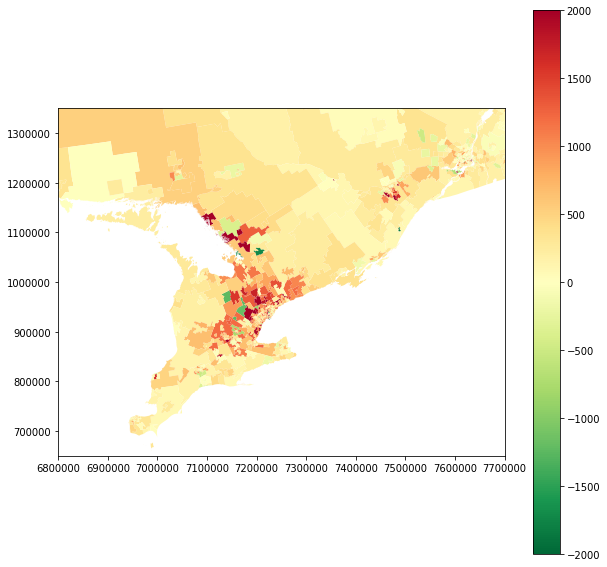

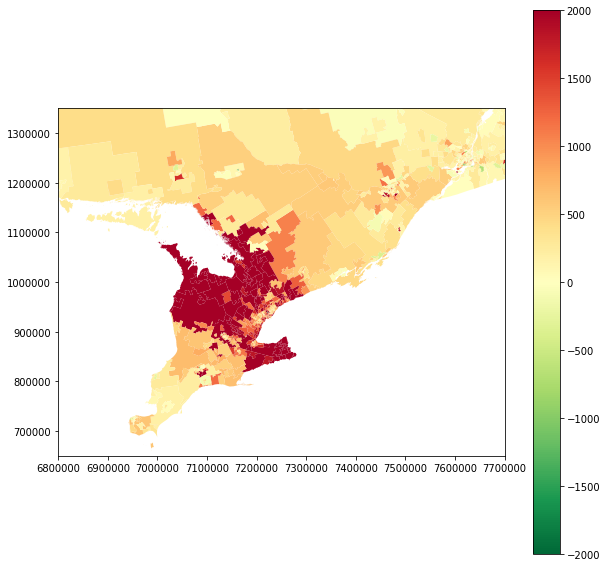

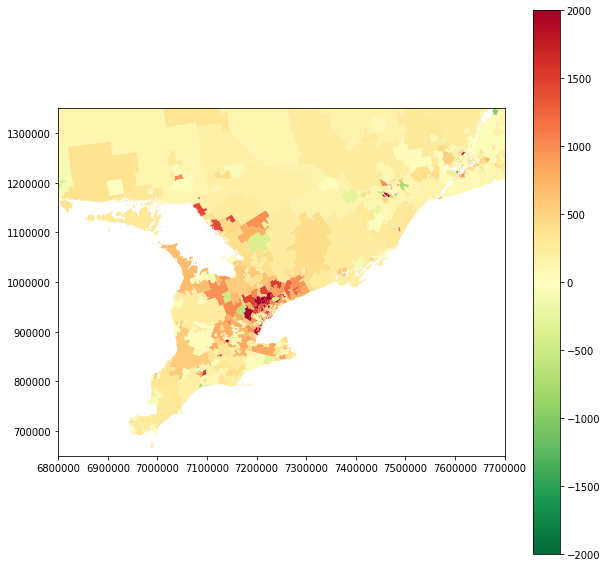

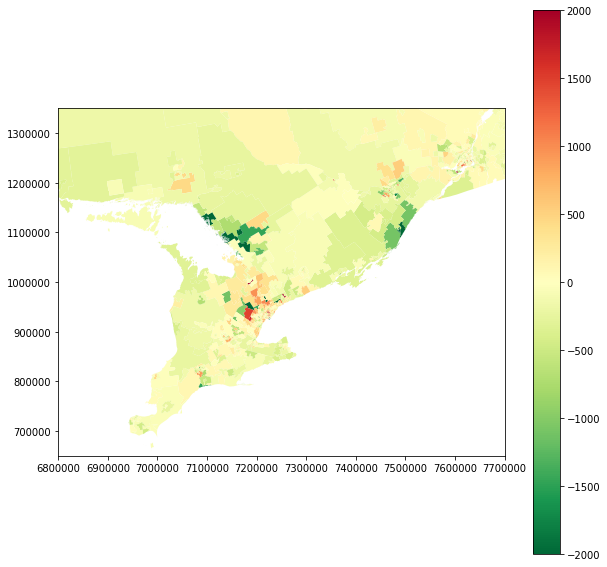

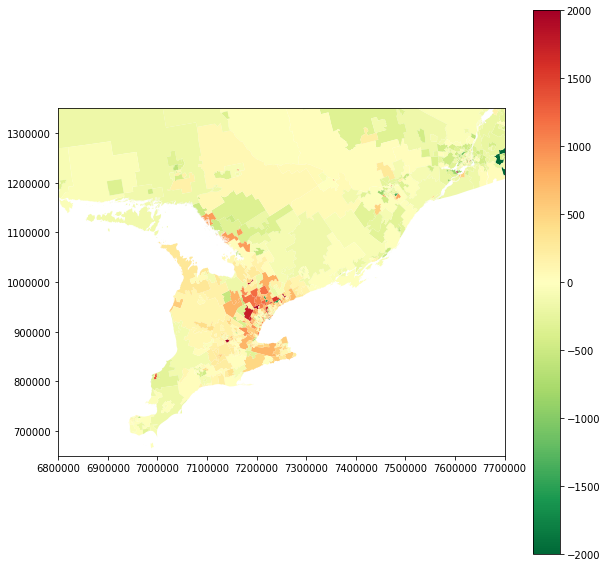

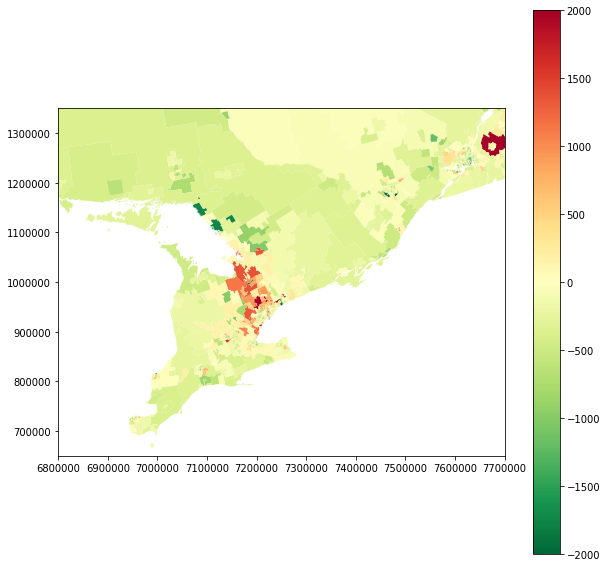

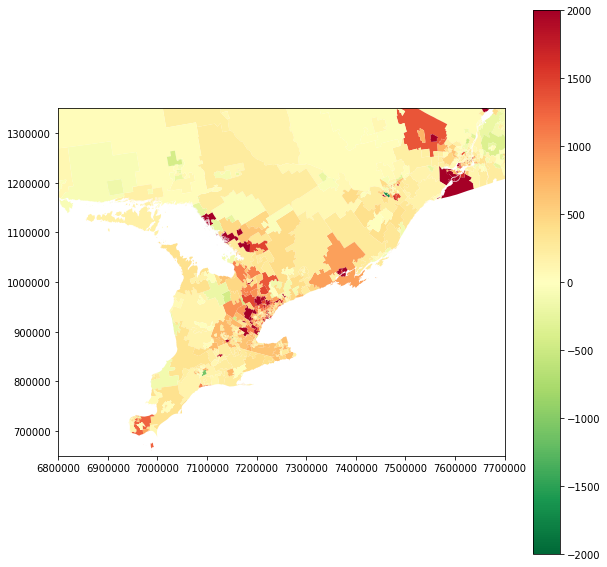

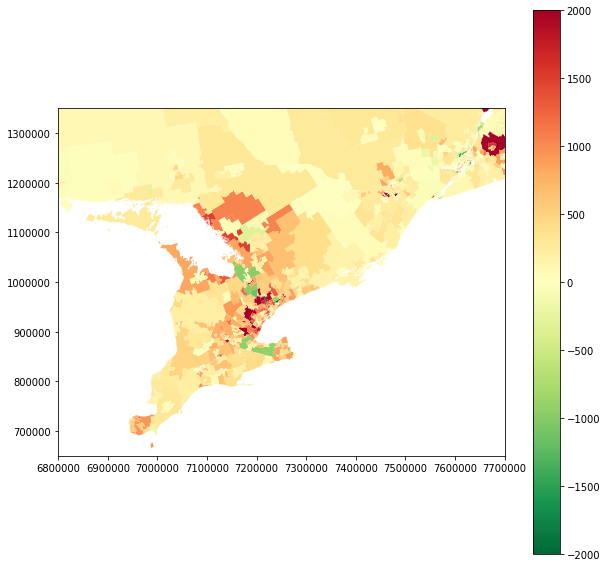

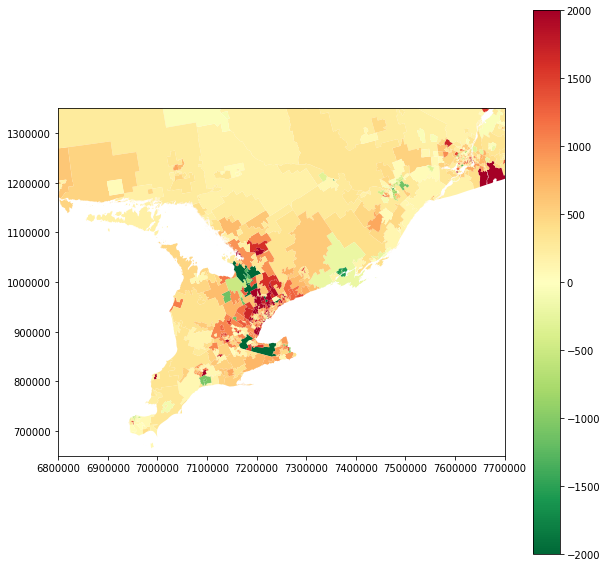

In [52]:
## change code so that map_201608_201707_0-11_test is the name

for date in date_list:
    ff1, aa1 = plt.subplots(1,figsize=(10,10))
    aa1 = df_fin2.plot(column='ddpp_'+date,cmap='RdYlGn_r',ax=aa1,legend=True,vmin=-2000,vmax=2000)
    aa1.set_xlim(6800000, 7700000)
    aa1.set_ylim(650000, 1350000)
    aa1.set_aspect('equal')
    plt.savefig('map_'+date+'_test.png')

In [ ]:
os.system("ffmpeg -f image2 -r 1 -i map_201608_201707_%02d.png -vcodec mpeg4 -y video_201608_201707_test.mp4")

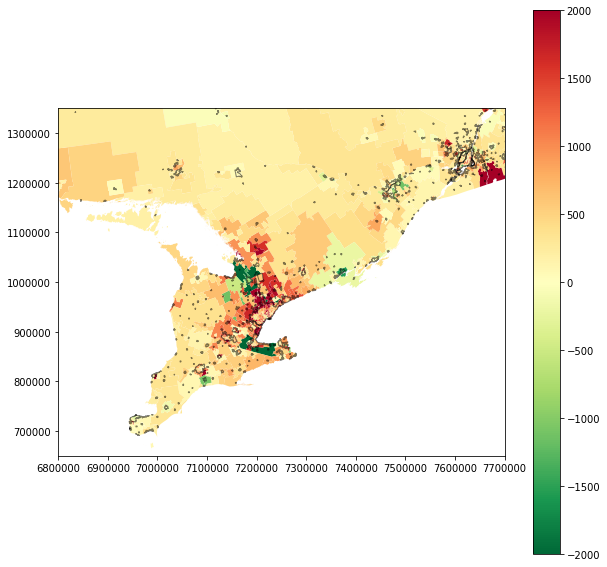

In [60]:
ff8, ax8 = plt.subplots(1,figsize=(10,10))
aa8 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=ax8,legend=True,vmin=-2000,vmax=2000)
ax8.set_xlim(6800000, 7700000)
ax8.set_ylim(650000, 1350000)
ax8.set_aspect('equal')
Pop_centers.plot(ax=ax8,edgecolor='black',alpha=0.5,facecolor='none')
plt.show()

In [62]:
lakes_rivers=geopandas.read_file("Lakes_Rivers\ghy_000c11a_e.shp")

In [63]:
lakes_rivers.head()

HYDROUID           NAME  RANK PRUID  \
0  7118222           None     6    10   
1  7980087  Lac Pas d'Eau     5    10   
2  8023051       Peg Lake     6    10   
3  6310365           None     7    10   
4  8101095   Belisle Lake     6    10   

                                            geometry  
0  POLYGON ((-61.97105030099993 52.20764714900008...  
1  POLYGON ((-65.59272299999992 52.57176317400007...  
2  POLYGON ((-65.90653673799994 53.32872107800006...  
3  POLYGON ((-61.62574747999992 53.22450768300007...  
4  POLYGON ((-63.50548292399992 52.10650446000005...

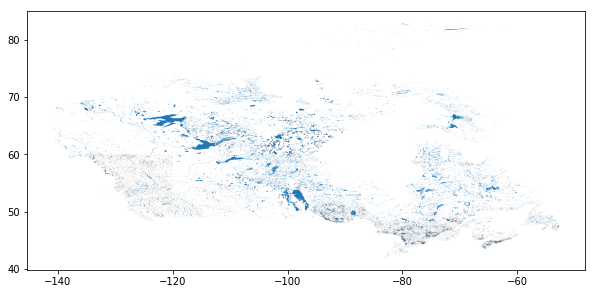

In [65]:
lakes_rivers.plot(figsize=(10,10))

In [71]:
lakes_rivers.crs

{'init': 'epsg:4269'}

In [72]:
Pop_centers.crs

{'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000}

In [73]:
df_fin2.crs

{'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000}

In [76]:
lakes_rivers2=lakes_rivers.to_crs({'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000})

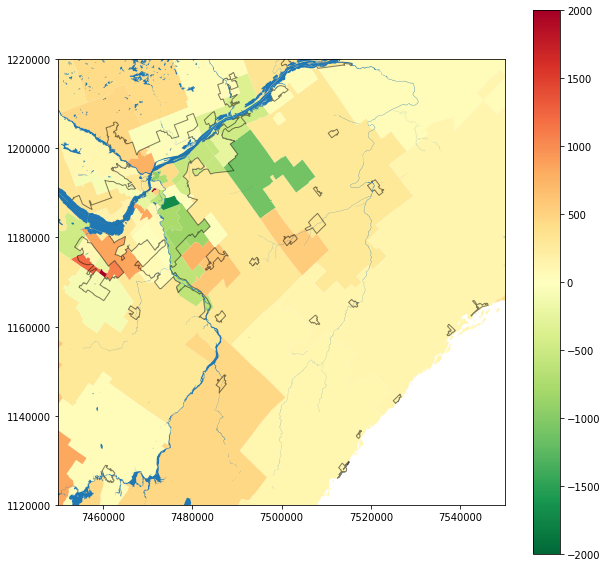

In [77]:
ff9, ax9 = plt.subplots(1,figsize=(10,10))
ax9 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=ax9,legend=True,vmin=-2000,vmax=2000)
ax9.set_xlim(7450000, 7550000)
ax9.set_ylim(1120000, 1220000)
ax9.set_aspect('equal')
Pop_centers.plot(ax=ax9,edgecolor='black',alpha=0.5,facecolor='none')
lakes_rivers2.plot(ax=ax9)
plt.show()

In [79]:
Ottawa_sidewalks=geopandas.read_file("Ottawa\Sidewalks_pathways\sidewalkspathwayswintermaintained.shp")

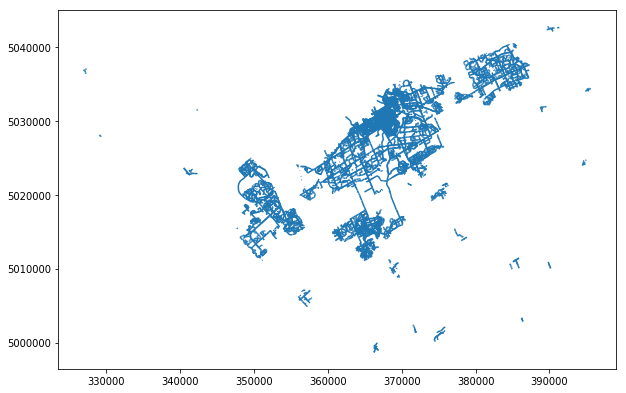

In [80]:
Ottawa_sidewalks.plot(figsize=(10,10))

In [82]:
Ottawa_wards=geopandas.read_file("Ottawa\Wards_2014\wards-2014_shp.shp")

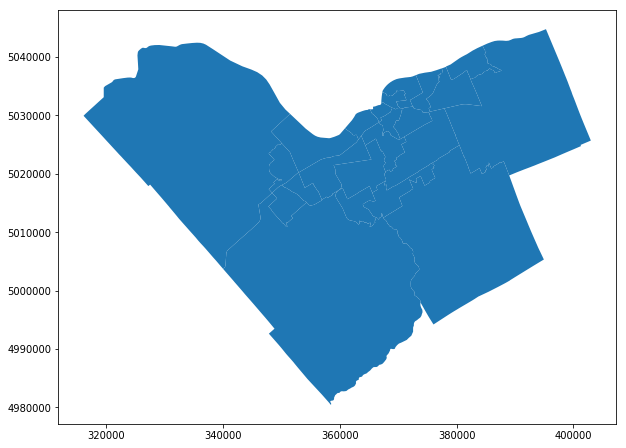

In [83]:
Ottawa_wards.plot(figsize=(10,10))

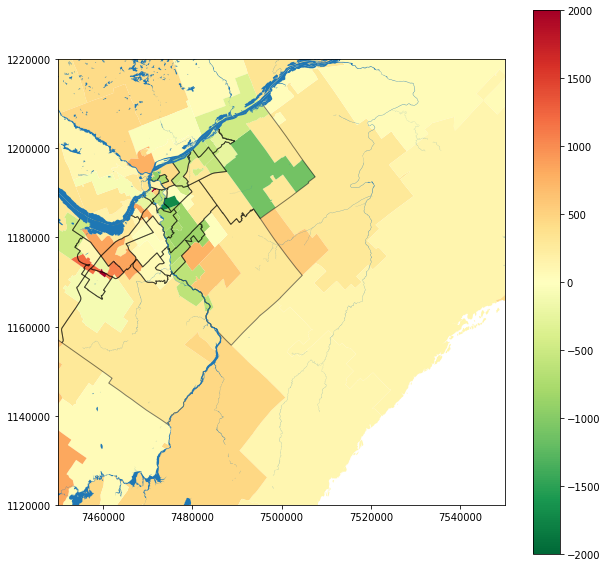

In [86]:
Ottawa_wards2=Ottawa_wards.to_crs({'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000})

ff10, ax10 = plt.subplots(1,figsize=(10,10))
ax10 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=ax10,legend=True,vmin=-2000,vmax=2000)
ax10.set_xlim(7450000, 7550000)
ax10.set_ylim(1120000, 1220000)
ax10.set_aspect('equal')
Ottawa_wards2.plot(ax=ax10,edgecolor='black',alpha=0.5,facecolor='none')
lakes_rivers2.plot(ax=ax10)
plt.show()

In [85]:
Metro_aggs.crs

{'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000}

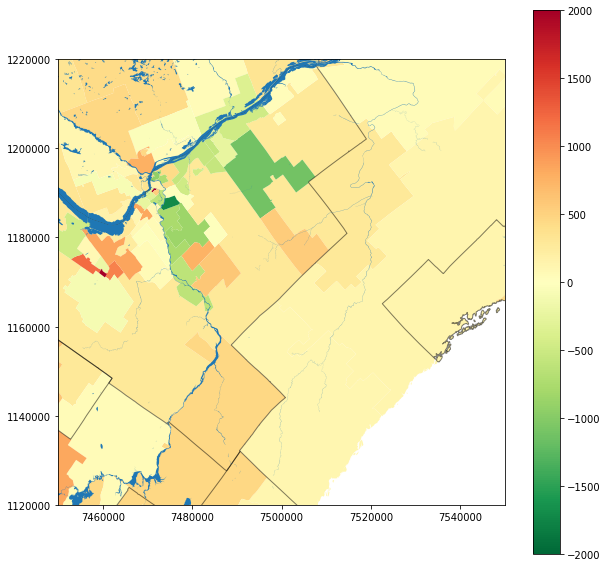

In [87]:
ff11, ax11 = plt.subplots(1,figsize=(10,10))
ax11 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=ax11,legend=True,vmin=-2000,vmax=2000)
ax11.set_xlim(7450000, 7550000)
ax11.set_ylim(1120000, 1220000)
ax11.set_aspect('equal')
Metro_aggs.plot(ax=ax11,edgecolor='black',alpha=0.5,facecolor='none')
lakes_rivers2.plot(ax=ax11)
plt.show()

In [88]:
Ottawa_roads=geopandas.read_file("Ottawa\Roads\Road Segments.shp")

In [218]:
Ottawa_roads.crs

{'datum': 'NAD83',
 'k': 0.9999,
 'lat_0': 0,
 'lon_0': -76.5,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 304800,
 'y_0': 0}

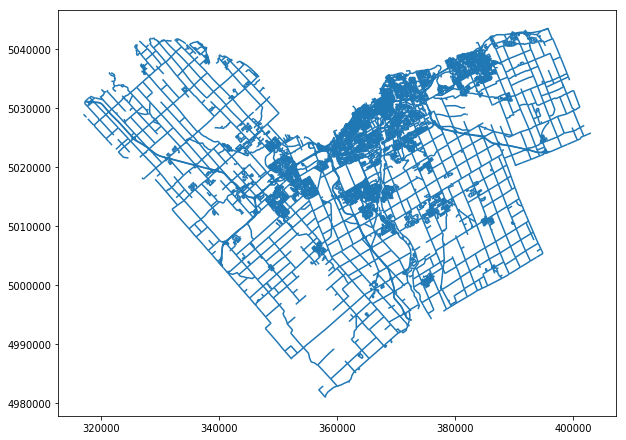

In [89]:
Ottawa_roads.plot(figsize=(10,10))

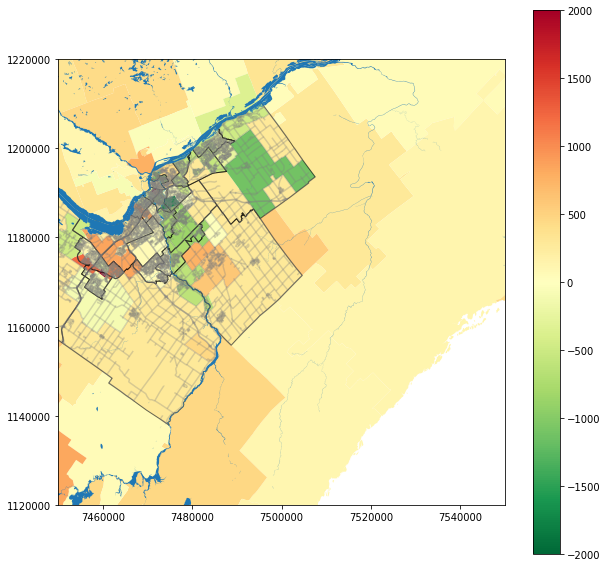

In [91]:
Ottawa_roads2=Ottawa_roads.to_crs({'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000})

ff12, ax12 = plt.subplots(1,figsize=(10,10))
ax12 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=ax12,legend=True,vmin=-2000,vmax=2000)
ax12.set_xlim(7450000, 7550000)
ax12.set_ylim(1120000, 1220000)
ax12.set_aspect('equal')
Ottawa_wards2.plot(ax=ax12,edgecolor='black',alpha=0.6,facecolor='none')
Ottawa_roads2.plot(ax=ax12,color='grey',alpha=0.3)
lakes_rivers2.plot(ax=ax12)
plt.show()

In [99]:
Ottawa_wards2.head(23)

DESCRIPTIO     NAME      NAME_FR WARD_NUM  \
0                KANATA SOUTH - Allan Hubley  Ward 23  Quartier 23       23   
1                          BAY - Mark Taylor   Ward 7   Quartier 7        7   
2                   OSGOODE - George Darouze  Ward 20  Quartier 20       20   
3         BEACON HILL-CYRVILLE - Tim Tierney  Ward 11  Quartier 11       11   
4                   COLLEGE - Rick Chiarelli   Ward 8   Quartier 8        8   
5   GLOUCESTER-SOUTH NEPEAN - Michael Qaqish  Ward 22  Quartier 22       22   
6          KANATA NORTH - Marianne Wilkinson   Ward 4   Quartier 4        4   
7             KNOXDALE-MERIVALE - Keith Egli   Ward 9   Quartier 9        9   
8                  RIVER - Riley Brockington  Ward 16  Quartier 16       16   
9               CAPITAL - David Chernushenko  Ward 17  Quartier 17       17   
10                KITCHISSIPPI - Jeff Leiper  Ward 15  Quartier 15       15   
11        GLOUCESTER-SOUTHGATE - Diane Deans  Ward 10  Quartier 10       10   
12                ALTA VISTA - Jean Cloutier  Ward 18  Quartier 18       18   
13                  STITTSVILLE - Shad Qadri   Ward 6   Quartier 6        6   
14            RIDEAU-VANIER - Mathieu Fleury  Ward 12  Quartier 12       12   
15         RIDEAU-ROCKCLIFFE - Tobi Nussbaum  Ward 13  Quartier 13       13   
16                        INNES - Jody Mitic   Ward 2   Quartier 2        2   
17                    ORLÃANS - Bob Monette   Ward 1   Quartier 1        1   
18                CUMBERLAND - Stephen Blais  Ward 19  Quartier 19       19   
19          RIDEAU-GOULBOURN - Scott Moffatt  Ward 21  Quartier 21       21   
20             SOMERSET - Catherine McKenney  Ward 14  Quartier 14       14   
21     WEST CARLETON-MARCH - Eli El-Chantiry   Ward 5   Quartier 5        5   
22                    BARRHAVEN - Jan Harder   Ward 3   Quartier 3        3   

                    WARD_EN                WARD_FR          COUNCILLOR  \
0              KANATA SOUTH             KANATA-SUD        Allan Hubley   
1                       BAY                   BAIE         Mark Taylor   
2                   OSGOODE                OSGOODE      George Darouze   
3      BEACON HILL-CYRVILLE   BEACON HILL-CYRVILLE         Tim Tierney   
4                   COLLEGE               COLLÃGE      Rick Chiarelli   
5   GLOUCESTER-SOUTH NEPEAN  GLOUCESTER-NEPEAN-SUD      Michael Qaqish   
6              KANATA NORTH            KANATA-NORD  Marianne Wilkinson   
7         KNOXDALE-MERIVALE      KNOXDALE-MERIVALE          Keith Egli   
8                     RIVER               RIVIÃRE   Riley Brockington   
9                   CAPITAL               CAPITALE  David Chernushenko   
10             KITCHISSIPPI           KITCHISSIPPI         Jeff Leiper   
11     GLOUCESTER-SOUTHGATE   GLOUCESTER-SOUTHGATE         Diane Deans   
12               ALTA VISTA             ALTA VISTA       Jean Cloutier   
13              STITTSVILLE            STITTSVILLE          Shad Qadri   
14            RIDEAU-VANIER          RIDEAU-VANIER      Mathieu Fleury   
15        RIDEAU-ROCKCLIFFE      RIDEAU-ROCKCLIFFE       Tobi Nussbaum   
16                    INNES                  INNES          Jody Mitic   
17                 ORLÃANS               ORLÃANS         Bob Monette   
18               CUMBERLAND             CUMBERLAND       Stephen Blais   
19         RIDEAU-GOULBOURN       RIDEAU-GOULBOURN       Scott Moffatt   
20                 SOMERSET               SOMERSET  Catherine McKenney   
21      WEST CARLETON-MARCH    WEST CARLETON-MARCH     Eli El-Chantiry   
22                BARRHAVEN              BARRHAVEN          Jan Harder   

                 WARD_NAME_               WARD_NAME1  WARD_NUMBE  \
0              Kanata South               Kanata-Sud          23   
1                       Bay                     Baie           7   
2                   Osgoode                  Osgoode          20   
3      Beacon Hill-Cyrville     Beacon Hill-Cyrville          11   
4                   

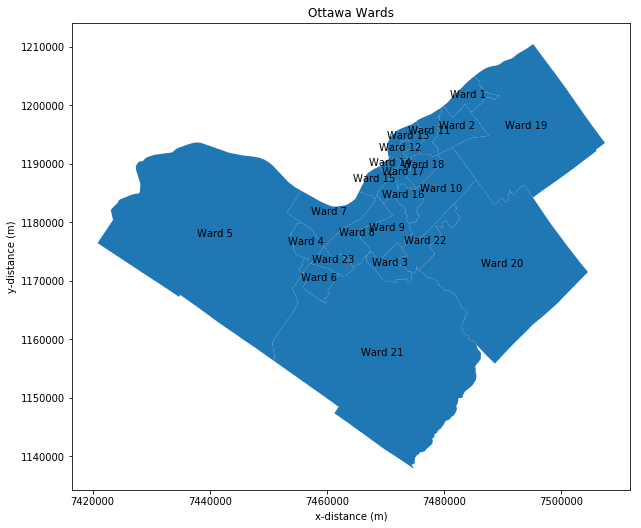

In [173]:
ff13, ax13 = plt.subplots(1,figsize=(10,10))
ax13 = Ottawa_wards2.plot(ax=ax13)
ax13.set_aspect('equal')
ax13.set_title("Ottawa Wards")
ax13.set_xlabel("x-distance (m)")
ax13.set_ylabel("y-distance (m)")
Ottawa_wards2.apply(lambda x: ax13.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
plt.show()

In [148]:
type(Ottawa_wards2[Ottawa_wards2['NAME']=='Ward 21']['geometry'])

geopandas.geoseries.GeoSeries

In [144]:
type(Ottawa_wards2.loc[19,'geometry'])

shapely.geometry.polygon.Polygon

In [145]:
print(Ottawa_wards2[Ottawa_wards2['NAME']=='Ward 21']['geometry'])
print("break")
print(Ottawa_wards2.loc[19,'geometry'])

19    POLYGON ((7467065.742873774 1174541.462974632,...
Name: geometry, dtype: object
break
POLYGON ((7467065.742873774 1174541.462974632, 7466949.635254131 1174350.907964134, 7466833.759013969 1174158.131711179, 7466786.709595723 1174045.490076305, 7466753.314154051 1173927.935830713, 7466730.280803036 1173803.585929218, 7466736.809976058 1173680.437555254, 7466743.7210458 1173581.355832393, 7466773.967045009 1173467.477486525, 7466822.010087634 1173336.723066399, 7466894.022912834 1173217.788555905, 7467000.025314339 1173093.784955771, 7467265.640852418 1172832.067104485, 7467820.278250436 1172293.145815088, 7468491.883155432 1171633.672400766, 7468870.098904416 1171130.104734439, 7469250.410876624 1170617.716592401, 7469438.91579884 1170360.068498017, 7469577.810877703 1170193.701994865, 7469668.345235342 1170120.922832171, 7469729.279314633 1170078.020351439, 7469795.571400214 1170034.591235578, 7470028.707989339 1169947.15938467, 7470182.100141872 1169921.605188976, 7470525.886599

In [159]:
type(Ottawa_wards2[Ottawa_wards2['NAME']=='Ward 21'].reset_index().loc[0,'geometry'])

shapely.geometry.polygon.Polygon

In [160]:
type(Ottawa_wards2[Ottawa_wards2['NAME']=='Ward 21'].iloc[0]['geometry'])

shapely.geometry.polygon.Polygon

In [161]:
type(Ottawa_wards2.at[19,'geometry'])

shapely.geometry.polygon.Polygon

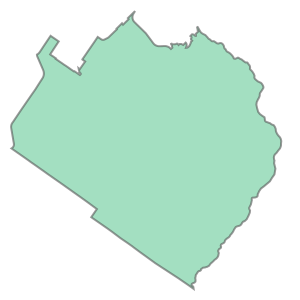

In [163]:
Ottawa_wards2[Ottawa_wards2['NAME']=='Ward 21'].at[19,'geometry']

In [171]:
type(Ottawa_wards2.set_index('NAME').at['Ward 21','geometry'])

shapely.geometry.polygon.Polygon

In [172]:
type(Ottawa_wards2.set_index('NAME').loc['Ward 21','geometry'])

shapely.geometry.polygon.Polygon

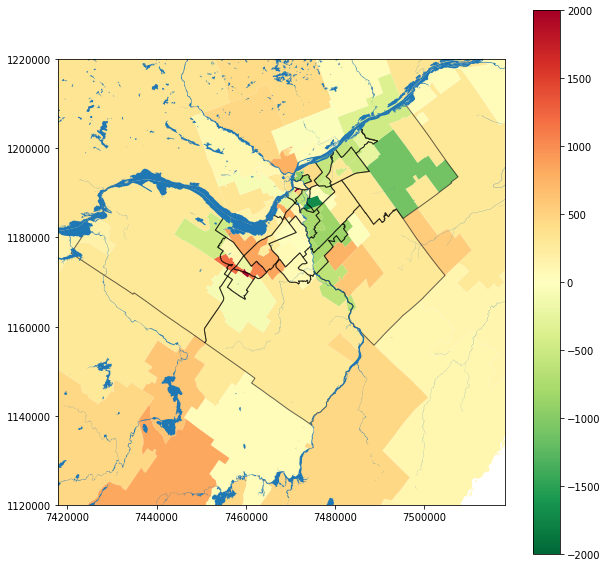

In [178]:
ff14, ax14 = plt.subplots(1,figsize=(10,10))
ax14 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=ax14,legend=True,vmin=-2000,vmax=2000)
ax14.set_xlim(7418000, 7518000)
ax14.set_ylim(1120000, 1220000)
ax14.set_aspect('equal')
Ottawa_wards2.plot(ax=ax14,edgecolor='black',alpha=0.6,facecolor='none')
#Ottawa_roads2.plot(ax=ax14,color='grey',alpha=0.3)
lakes_rivers2.plot(ax=ax14)
plt.show()

In [279]:
inProj = Proj(init='epsg:4326')
outProj = Proj({'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000})

x1,y1 = -75.702872,45.420767
x2,y2 = transform(inProj,outProj,x1,y1)
bank_loc=[Point(x2,y2)]
print(bank_loc)

In [281]:
bank=pd.DataFrame({'name':['Bank of Canada']})
crs={'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000}
geometry = bank_loc
bank_gdf = geopandas.GeoDataFrame(bank, crs=crs, geometry=geometry)

#EPSG:3857 or EPSG:900913 #4326 #4269

In [282]:
bank_gdf.head()

name                                     geometry
0  Bank of Canada  POINT (7470826.294956843 1190450.602720559)

In [283]:
bank_gdf.crs

{'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000}

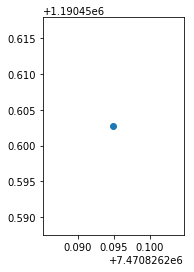

In [284]:
bank_gdf.plot()

In [300]:
bank_gdf.geometry.y

0    1.190451e+06
dtype: float64

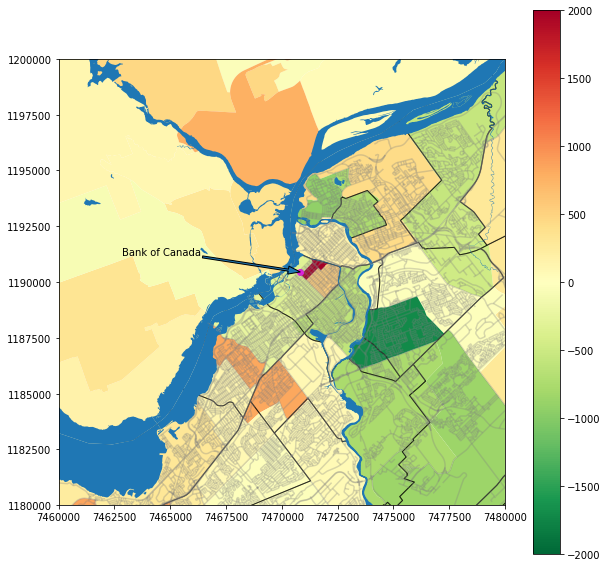

In [324]:
ff15, ax15 = plt.subplots(1,figsize=(10,10))
ax15 = df_fin2.plot(column='ddpp_201707',cmap='RdYlGn_r',ax=ax15,legend=True,vmin=-2000,vmax=2000)
ax15.set_xlim(7460000, 7480000)
ax15.set_ylim(1180000, 1200000)
ax15.set_aspect('equal')
Ottawa_wards2.plot(ax=ax15,edgecolor='black',alpha=0.6,facecolor='none')
Ottawa_roads2.plot(ax=ax15,color='grey',alpha=0.3)
lakes_rivers2.plot(ax=ax15)
bank_gdf.plot(ax=ax15,color='fuchsia')
ax15.annotate("Bank of Canada",xy=(bank_gdf.geometry.x,bank_gdf.geometry.y),xytext=(0.2,0.55),
              textcoords='figure fraction',arrowprops=dict(width=2,headlength=12,headwidth=8))
#plt.show()
plt.savefig('example2.png')

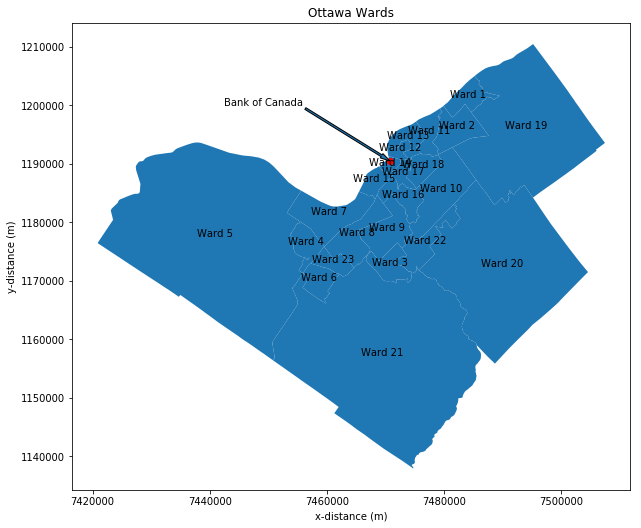

In [326]:
ff17, ax17 = plt.subplots(1,figsize=(10,10))
Ottawa_wards2.plot(ax=ax17)
ax17.set_aspect('equal')
ax17.set_title("Ottawa Wards")
ax17.set_xlabel("x-distance (m)")
ax17.set_ylabel("y-distance (m)")
Ottawa_wards2.apply(lambda x: ax17.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
bank_gdf.plot(ax=ax17,color='red')
ax17.annotate("Bank of Canada",xy=(bank_gdf.geometry.x,bank_gdf.geometry.y),xytext=(0.35,0.8),
              textcoords='figure fraction',arrowprops=dict(width=2,headlength=10,headwidth=5))
plt.show()

In [340]:
#ward19=Ottawa_wards2[Ottawa_wards2['NAME']=='Ward 19'].iloc[0]['geometry']
ward19=Ottawa_wards2[Ottawa_wards2['NAME']=='Ward 19']
ward5=Ottawa_wards2[Ottawa_wards2['NAME']=='Ward 5']
ward21=Ottawa_wards2[Ottawa_wards2['NAME']=='Ward 21']
wards_5_21=Ottawa_wards2[(Ottawa_wards2['NAME']=='Ward 5') | (Ottawa_wards2['NAME']=='Ward 21')]

In [341]:
wards_5_21.head()

DESCRIPTIO     NAME      NAME_FR WARD_NUM  \
19       RIDEAU-GOULBOURN - Scott Moffatt  Ward 21  Quartier 21       21   
21  WEST CARLETON-MARCH - Eli El-Chantiry   Ward 5   Quartier 5        5   

                WARD_EN              WARD_FR       COUNCILLOR  \
19     RIDEAU-GOULBOURN     RIDEAU-GOULBOURN    Scott Moffatt   
21  WEST CARLETON-MARCH  WEST CARLETON-MARCH  Eli El-Chantiry   

                 WARD_NAME_               WARD_NAME1  WARD_NUMBE  \
19         Rideau-Goulbourn         Rideau-Goulbourn          21   
21  West Carleton â March  West Carleton â March           5   

       SHAPE_Leng    SHAPE_Area  \
19  131359.058256  7.365599e+08   
21  122388.216983  7.655695e+08   

                                             geometry  
19  POLYGON ((7467065.742873774 1174541.462974632,...  
21  POLYGON ((7438548.140970244 1193535.263477589,...

In [346]:
wards_5_21.crs

{'datum': 'NAD83',
 'lat_0': 63.390675,
 'lat_1': 49,
 'lat_2': 77,
 'lon_0': -91.86666666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 6200000,
 'y_0': 3000000}

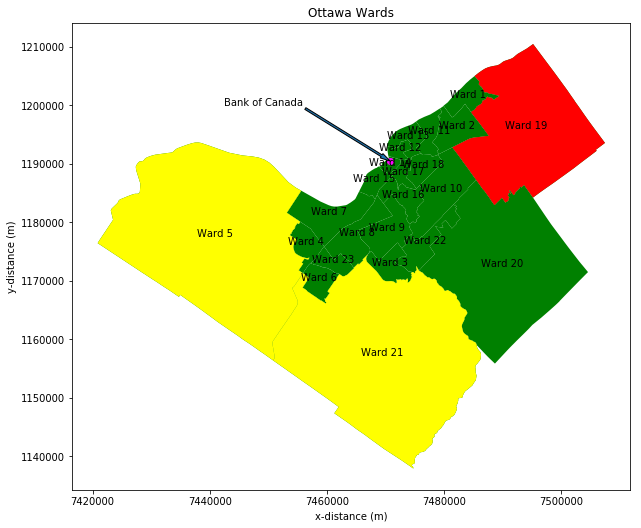

In [383]:
ff19, ax19 = plt.subplots(1,figsize=(10,10))
#for poly in Ottawa_wards2['geometry']:
#    geopandas.plotting.plot_multipolygon(ax19, poly, facecolor='black', linewidth=0.025)
#    geopandas.plot(ax19, poly, facecolor='black', linewidth=0.025)
Ottawa_wards2.plot(ax=ax19, facecolor='green', linewidth=0.025)
ward19.plot(ax=ax19, alpha=1, facecolor='red', linewidth=0)
wards_5_21.plot(ax=ax19, alpha=1, facecolor='yellow', linewidth=0)
ax19.set_aspect('equal')
ax19.set_title("Ottawa Wards")
ax19.set_xlabel("x-distance (m)")
ax19.set_ylabel("y-distance (m)")
Ottawa_wards2.apply(lambda x: ax19.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
bank_gdf.plot(ax=ax19,color='fuchsia')
ax19.annotate("Bank of Canada",xy=(bank_gdf.geometry.x,bank_gdf.geometry.y),xytext=(0.35,0.8),
              textcoords='figure fraction',arrowprops=dict(width=2,headlength=10,headwidth=5))
plt.show()

In [396]:
print(ward19['SHAPE_Area'])
print(ward19.to_crs({'proj':'cea'}).area)
print(ward19.area)
print(ward19.to_crs({'init': 'epsg:3857'}).area)
print(ward19.to_crs(epsg=4326).area)
print(ward19.to_crs({'init': 'epsg:3395'}).area)
print(ward19.to_crs({'init': 'epsg:2029'}).area)
ward19_area=ward19.to_crs({'proj':'cea'}).area

18    3.798366e+08
Name: SHAPE_Area, dtype: float64
18    3.798434e+08
dtype: float64
18    3.916675e+08
dtype: float64
18    7.707976e+08
dtype: float64
18    0.043663
dtype: float64
18    7.682464e+08
dtype: float64
18    3.813421e+08
dtype: float64


In [403]:
print(ward21.to_crs({'proj':'cea'}).centroid.iloc[0].distance(ward5.to_crs({'proj':'cea'}).centroid.iloc[0]))
print(ward21.centroid.iloc[0].distance(ward5.centroid.iloc[0]))
print(ward21.to_crs({'init': 'epsg:2029'}).centroid.iloc[0].distance(ward5.to_crs({'init': 'epsg:2029'}).centroid.iloc[0]))

36836.056362717536
35083.32510855639
34578.13081280725


In [415]:
R_Earth_Ottawa=6367332

In [410]:
omega1=ward5.to_crs(epsg=4326).centroid.iloc[0]
omega2=ward21.to_crs(epsg=4326).centroid.iloc[0]
print(omega1)
print(omega2)

POINT (-76.10878752282186 45.37529327875153)
POINT (-75.82255536769132 45.13938477391463)


In [409]:
del_phi=abs(omega2.x-omega1.x)
del_psi=abs(omega2.y-omega1.y)
print(del_phi)
print(del_psi)

0.28623215513053424
0.23590850483690673


In [418]:
dist_w5w21=R_Earth_Ottawa*math.acos(math.sin(omega1.y*math.pi/180)*math.sin(omega2.y*math.pi/180)+
          math.cos(omega1.y*math.pi/180)*math.cos(omega2.y*math.pi/180)*math.cos(del_phi*math.pi/180))
print(dist_w5w21)

34477.27830003596


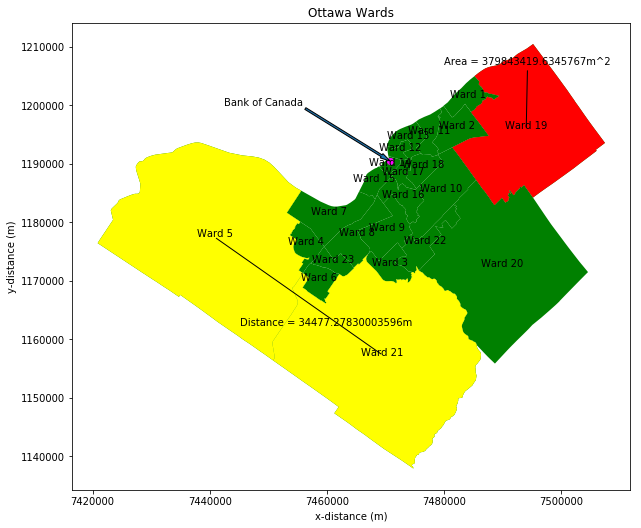

In [438]:
ff20, ax20 = plt.subplots(1,figsize=(10,10))
Ottawa_wards2.plot(ax=ax20, facecolor='green', linewidth=0.025)
ward19.plot(ax=ax20, alpha=1, facecolor='red', linewidth=0)
wards_5_21.plot(ax=ax20, alpha=1, facecolor='yellow', linewidth=0)
ax20.set_aspect('equal')
ax20.set_title("Ottawa Wards")
ax20.set_xlabel("x-distance (m)")
ax20.set_ylabel("y-distance (m)")
Ottawa_wards2.apply(lambda x: ax20.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
bank_gdf.plot(ax=ax20,color='fuchsia')
ax20.annotate("Bank of Canada",xy=(bank_gdf.geometry.x,bank_gdf.geometry.y),xytext=(0.35,0.8),
              textcoords='figure fraction',arrowprops=dict(width=2,headlength=10,headwidth=5))
#ax20.annotate("Area = "+str(ward19_area),xy=(ward19.geometry.centroid.x,ward19.geometry.centroid.y),xytext=(0.8,0.8),
#              textcoords='figure fraction',arrowprops=dict(width=2,headlength=10,headwidth=5))
ax20.annotate("Area = "+str(ward19_area.iloc[0])+'m^2',xy=(ward19.geometry.centroid.x,ward19.geometry.centroid.y),
              xytext=(ward19.geometry.centroid.x-14000,ward19.geometry.centroid.y+11000),arrowprops=dict(arrowstyle='-'))
ax20.annotate('',xy=(ward5.geometry.centroid.x,ward5.geometry.centroid.y),
              xytext=(ward21.geometry.centroid.x,ward21.geometry.centroid.y),arrowprops=dict(arrowstyle='-'))
xx=(ward5.geometry.centroid.x.iloc[0]+ward21.geometry.centroid.x.iloc[0])/2
yy=(ward5.geometry.centroid.y.iloc[0]+ward21.geometry.centroid.y.iloc[0])/2
#ax20.annotate("Distance = "+str(dist_w5w21),xy=(xx,yy),xytext=(xx-12000,yy),arrowprops=dict(arrowstyle='-'))
ax20.text(xx-10000,yy-5000,"Distance = "+str(dist_w5w21)+'m')

plt.show()

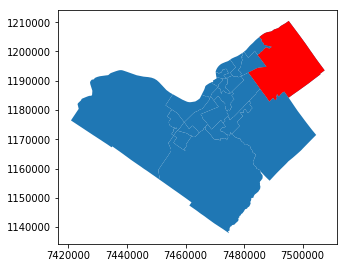

In [441]:
ff21, ax21 = plt.subplots(1,figsize=(5,5))
Ottawa_wards2.plot(ax=ax21)
ward19.plot(ax=ax21, alpha=1, facecolor='red', linewidth=0)
ax21.set_aspect('equal')
plt.show()

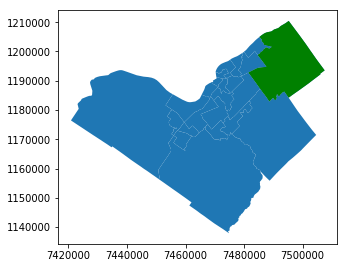

In [442]:
ff22, ax22 = plt.subplots(1,figsize=(5,5))
Ottawa_wards2.plot(ax=ax22)
ward19.plot(ax=ax22, alpha=1, facecolor='green', linewidth=0)
ax22.set_aspect('equal')
plt.show()

In [541]:
ff23, ax23 = plt.subplots(1,figsize=(5,5))
ax23.set_aspect('equal')
Ottawa_wards2.plot(ax=ax23)
Ottawa_wards2.apply(lambda x: ax23.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

colors=['red','white','yellow','green']

def update(ii):
    color_i=colors[ii]
    plot_ward=ward19.plot(ax=ax23, alpha=1, facecolor=color_i, linewidth=0)
    return plot_ward,


anim = FuncAnimation(plt.gcf(),update,interval=500,frames=range(4),blit=False)
#anim = FuncAnimation(plt.gcf(),update,interval=500,repeat=False,frames=203,blit=True)

plt.close()
#plt.show();
HTML(anim.to_jshtml())

<Figure size 432x288 with 0 Axes>

In [519]:
ff25, ax25 = plt.subplots(1,figsize=(5,5))
def update(ii):
    color_i='red'
    plot_ward=ward19.plot(ax=ax25, alpha=1, facecolor=color_i, linewidth=0)
    return plot_ward,
print(type(update(0)[0]))
plt.close()

<class 'matplotlib.axes._subplots.AxesSubplot'>


In [585]:
class Video(object):
    def __init__(self,path):
        self.path = path

    def play(self):
        from os import startfile
        startfile(self.path)

class Movie_MP4(Video):
    type = "MP4"

movie = Movie_MP4(r"video_example_1.mp4")
movie.play()

In [587]:
fig,ax = plt.subplots(1,figsize=(5,5))
ax.set_aspect('equal')
ax.set_axis_off()

def init():
    imobj.set_data(np.zeros((100, 100)))
    return  imobj,

def animate(i):
    fname = "map_201608_201707_%02d.png" % i 
    img = mgimg.imread(fname)[-1::-1]
    imobj.set_data(img)
    return  imobj,

imobj = ax.imshow(np.zeros((100, 100)), origin='lower', alpha=1.0, zorder=1, aspect=1, animated=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, repeat = True,
                               frames=range(12), interval=1000, blit=True, repeat_delay=1000)

plt.close()
HTML(anim.to_jshtml())

In [588]:
fig = plt.figure()

myimages = []

for p in range(5):
#    fname = "map_201608_201707_%02d.png" %p
    fname = 'map_201608_201707_0'+str(p)+'.png' 
    img = mgimg.imread(fname)
    imgplot = plt.imshow(img)

    myimages.append([imgplot])

## create an instance of animation
my_anim = animation.ArtistAnimation(fig, myimages, interval=1000, blit=True, repeat_delay=1000)

## NB: The 'save' method here belongs to the object you created above
#my_anim.save("animation.mp4")

## Showtime!
#plt.show()
#my_anim
plt.close()

HTML(anim.to_jshtml())

In [581]:
ff24, ax24 = plt.subplots(1,figsize=(5,5))
ax24.set_aspect('equal')
Ottawa_wards2.plot(ax=ax24)
#plot_ward=ward19.plot(ax=ax23, alpha=1, facecolor='red', linewidth=0)

colors=['red','green','yellow','black']

artists=[]

def artist(x):
    plot_ward=ward19.plot(ax=ax24, alpha=1, facecolor=x, linewidth=0)
    return [plot_ward]

for x in colors:
    artists.append(artist(x))


anim = animation.ArtistAnimation(ff24, artists)

plt.close()
#plt.show();
HTML(anim.to_jshtml())